# IDENTIFY DIRECTORIES AND INSTALL

In [1]:
cd /home/osman.yogurtcu/Documents/Projects/Python/Scoreboard/Notebooks

/home/osman.yogurtcu/Documents/Projects/Python/Scoreboard/Notebooks


In [2]:
#PLEASE CHANGE 'covidhubdir' TO YOUR OWN ???/???/???/covid19-forecast-hub/data-processed
from pathlib import Path
import os
covidhubdir = '/home/osman.yogurtcu/Documents/Projects/Python/covid19-forecast-hub/data-processed'
mypwd = !pwd
gitdir = str(Path(mypwd[0]).parent)
figuresdirectory = gitdir + '/' + 'Figures'

In [3]:
cd ..

/home/osman.yogurtcu/Documents/Projects/Python/Scoreboard


In [4]:
!pip install --upgrade -e .

Obtaining file:///home/osman.yogurtcu/Documents/Projects/Python/Scoreboard


  Attempting uninstall: Scoreboard
    Found existing installation: Scoreboard 0.4
    Uninstalling Scoreboard-0.4:
      Successfully uninstalled Scoreboard-0.4
  Running setup.py develop for Scoreboard


In [5]:
os.chdir(mypwd[0])

In [6]:
!pwd

/home/osman.yogurtcu/Documents/Projects/Python/Scoreboard/Notebooks


# IMPORTS

In [7]:
import Scoreboard19 as S19
from tqdm import tqdm
import scipy.interpolate
import pandas as pd
import numpy as np
from datetime import date, datetime, timedelta
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker
import matplotlib.pylab as pl
import matplotlib.dates as mdates
import shutil

# READ PREDICTIONS FROM COVID HUB

In [8]:
newPath = shutil.copy('../Rcode/read_processed_dataONY.R', 
                      covidhubdir)
os.chdir(covidhubdir)

In [9]:
rm *.csv

In [10]:
cd ..

/home/osman.yogurtcu/Documents/Projects/Python/covid19-forecast-hub


In [11]:
# !git fetch origin
# !git reset --hard origin/master
!git pull

remote: Enumerating objects: 13, done.
remote: Counting objects: 100% (13/13), done.
remote: Compressing objects: 100% (2/2), done.
remote: Total 15 (delta 11), reused 12 (delta 11), pack-reused 2
Unpacking objects: 100% (15/15), 2.80 MiB | 6.69 MiB/s, done.
From https://github.com/reichlab/covid19-forecast-hub
   968c64ee..8c621aa5  master     -> origin/master
Updating 968c64ee..8c621aa5
Fast-forward
 code/validation/locally_validated_files.csv        |      1 +
 code/validation/validated_files.csv                |      1 +
 code/zoltar_scripts/validated_file_db.json         |      3 +-
 .../IHME-CurveFit/2020-10-16-IHME-CurveFit.csv     | 213409 ++++++++++++++++++
 4 files changed, 213413 insertions(+), 1 deletion(-)
 create mode 100644 data-processed/IHME-CurveFit/2020-10-16-IHME-CurveFit.csv


In [12]:
cd data-processed

/home/osman.yogurtcu/Documents/Projects/Python/covid19-forecast-hub/data-processed


In [13]:
!Rscript read_processed_dataONY.R #Read forecasts in COVID-19 Forecast Hub - this step takes about 10 minutes


Attaching package: ‘dplyr’

The following objects are masked from ‘package:stats’:

    filter, lag

The following objects are masked from ‘package:base’:

    intersect, setdiff, setequal, union



In [14]:
newPath = shutil.copy('all_dataONY.csv', 
                      mypwd[0])

In [15]:
os.chdir(mypwd[0])
newPath = shutil.move('all_dataONY.csv', 
                      gitdir + '/' + 'Data/all_dataONY.csv')

# BUILD SCOREBOARD

## BUILD SCOREBOARD FOR INCIDENTAL CASES

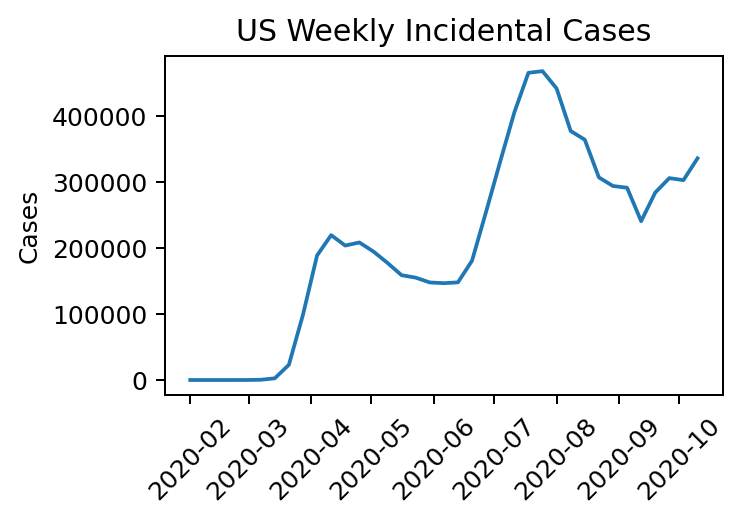

In [16]:
US_cases = S19.readobservedcases()
S19.plotUSIncCases(US_cases)

In [17]:
FirstForecasts = S19.getscoreboard(US_cases,'Case','../Data/ScoreboardCases.pkl')

100%|██████████| 1803/1803 [04:30<00:00,  6.67it/s]


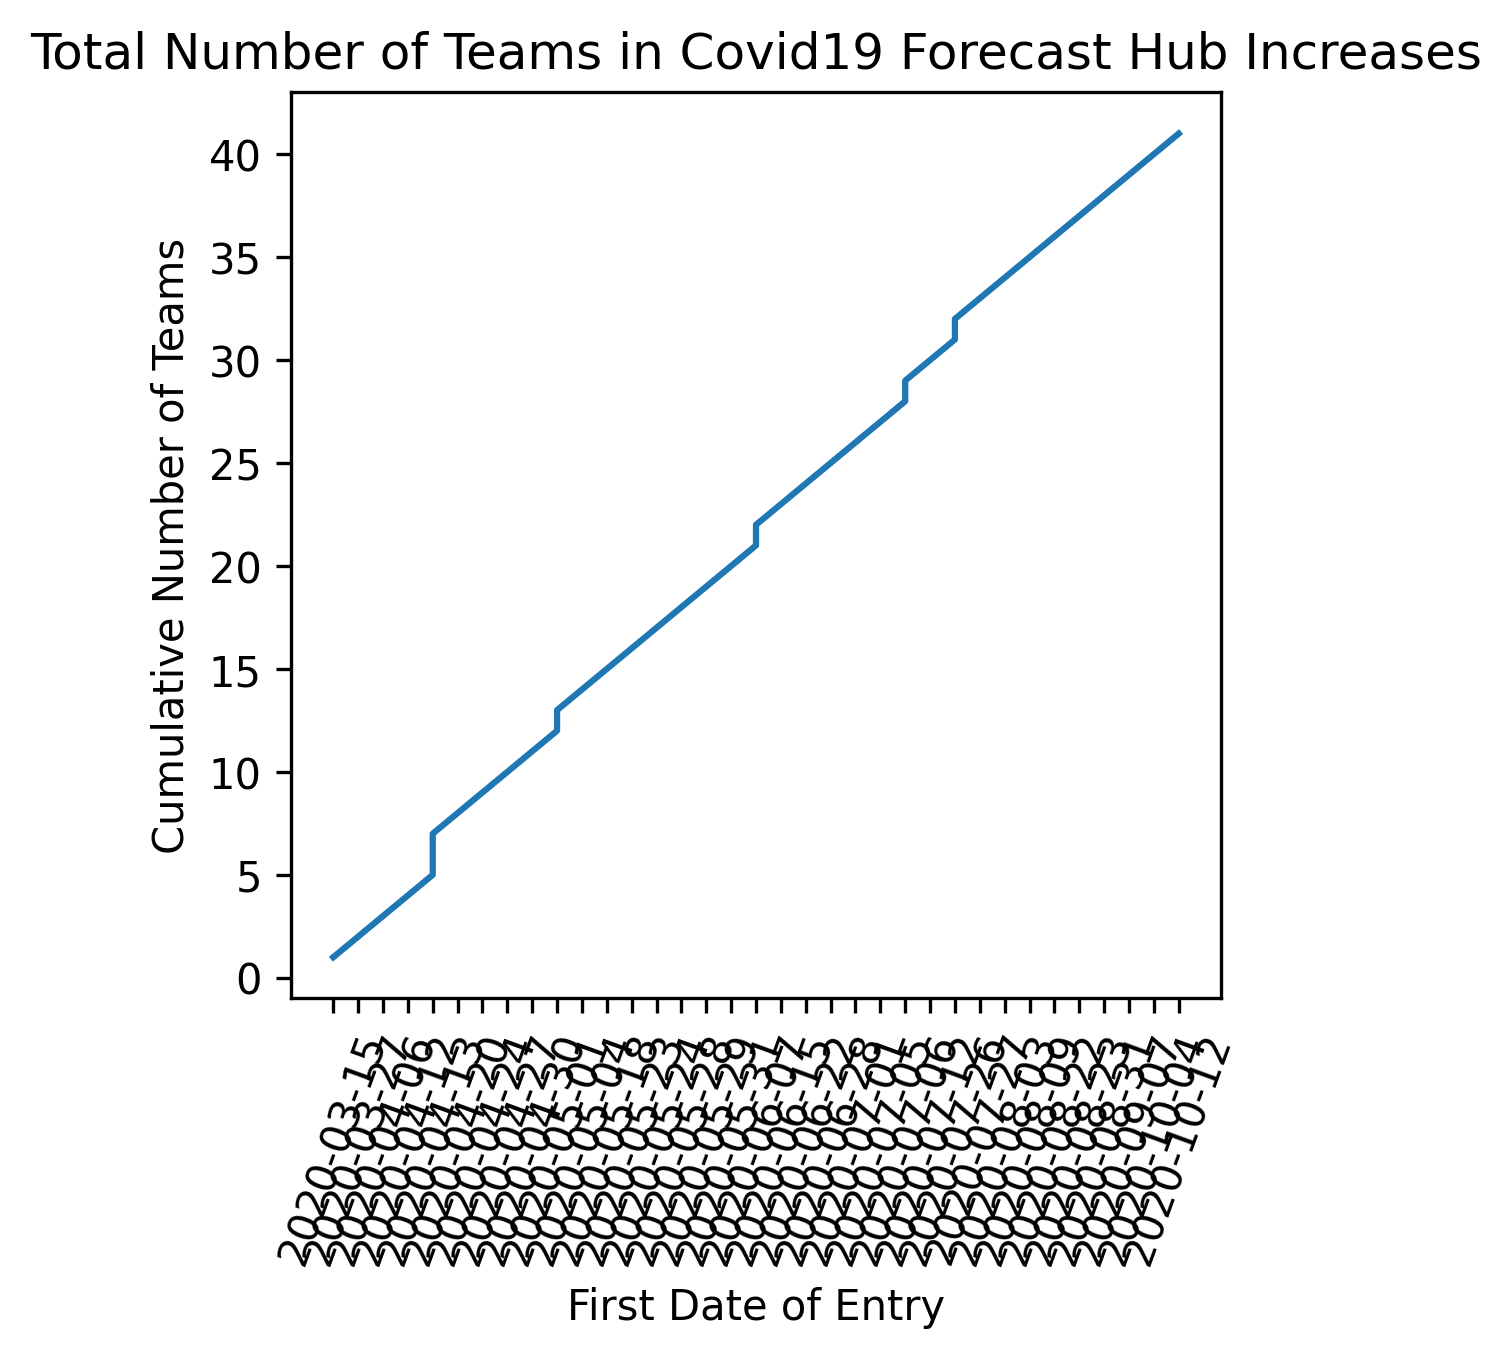

In [18]:
S19.numberofteamsincovidhub(FirstForecasts)

/home/osman.yogurtcu/anaconda3/lib/python3.7/site-packages/numpy/lib/histograms.py:839: RuntimeWarning: invalid value encountered in greater_equal
  keep = (tmp_a >= first_edge)
/home/osman.yogurtcu/anaconda3/lib/python3.7/site-packages/numpy/lib/histograms.py:840: RuntimeWarning: invalid value encountered in less_equal
  keep &= (tmp_a <= last_edge)


Maximum % conversion error:
2.226586401542141
Unique models in the scoreboard:
0. COVIDhub:baseline
1. LANL:GrowthRate
2. Covid19Sim:Simulator
3. UCLA:SuEIR
4. Columbia_UNC:SurvCon
5. JHU_IDD:CovidSP
6. IowaStateLW:STEM
7. OliverWyman:Navigator
8. USACE:ERDC_SEIR
9. CovidAnalytics:DELPHI
10. UMich:RidgeTfReg
11. RobertWalraven:ESG
12. QJHong:Encounter
13. LNQ:ens1
14. IHME:CurveFit
15. COVIDhub:ensemble
16. Karlen:pypm
17. DDS:NBDS
18. CU:nochange
19. CU:select
20. CU:scenario_low
21. CU:scenario_mid
22. CU:scenario_high
23. CEID:Walk
24. JHUAPL:Bucky
Models in Scoreboard that are not yet in modeltypes.dat:
[]
Edit modeltypes.dat accordingly


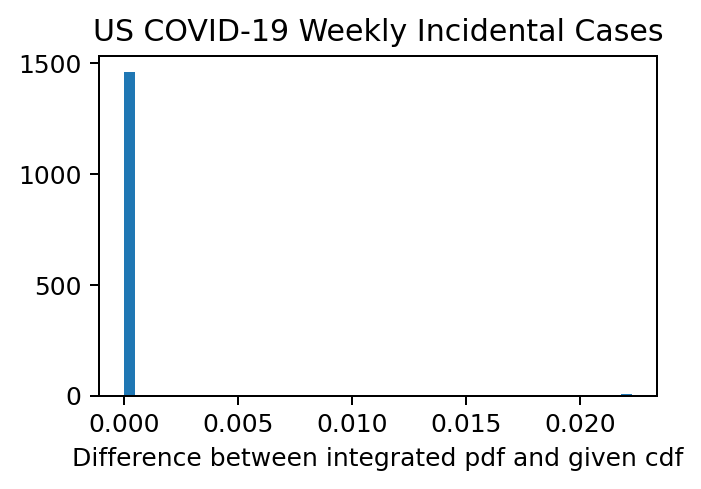

In [20]:
ScoreboardCases = pd.read_pickle('../Data/ScoreboardCases.pkl')
S19.plotdifferencescdfpdf(ScoreboardCases,'Case')
modeltypesCases = S19.getmodeltypes(ScoreboardCases)

In [21]:
%%capture cap --no-stderr
themodels = ScoreboardCases['model'].unique()
for i in range(0,len(themodels)):
    print(themodels[i])

In [22]:
#Writing out all the models in the scoreboard into a text file
with open('../INCCASE_Models.txt', 'w') as f:
    f.write(cap.stdout)

In [23]:
#Eliminate scores that do not have the proper score quantiles
delete_row = ScoreboardCases[ScoreboardCases["proper"]==False].index
ScoreboardCases.drop(delete_row,inplace=True)

<Figure size 2400x1200 with 0 Axes>

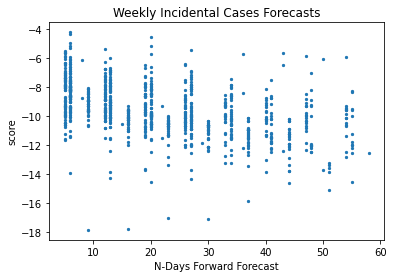

<Figure size 2400x1200 with 0 Axes>

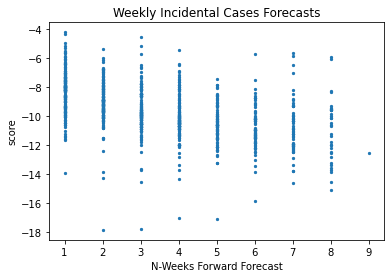

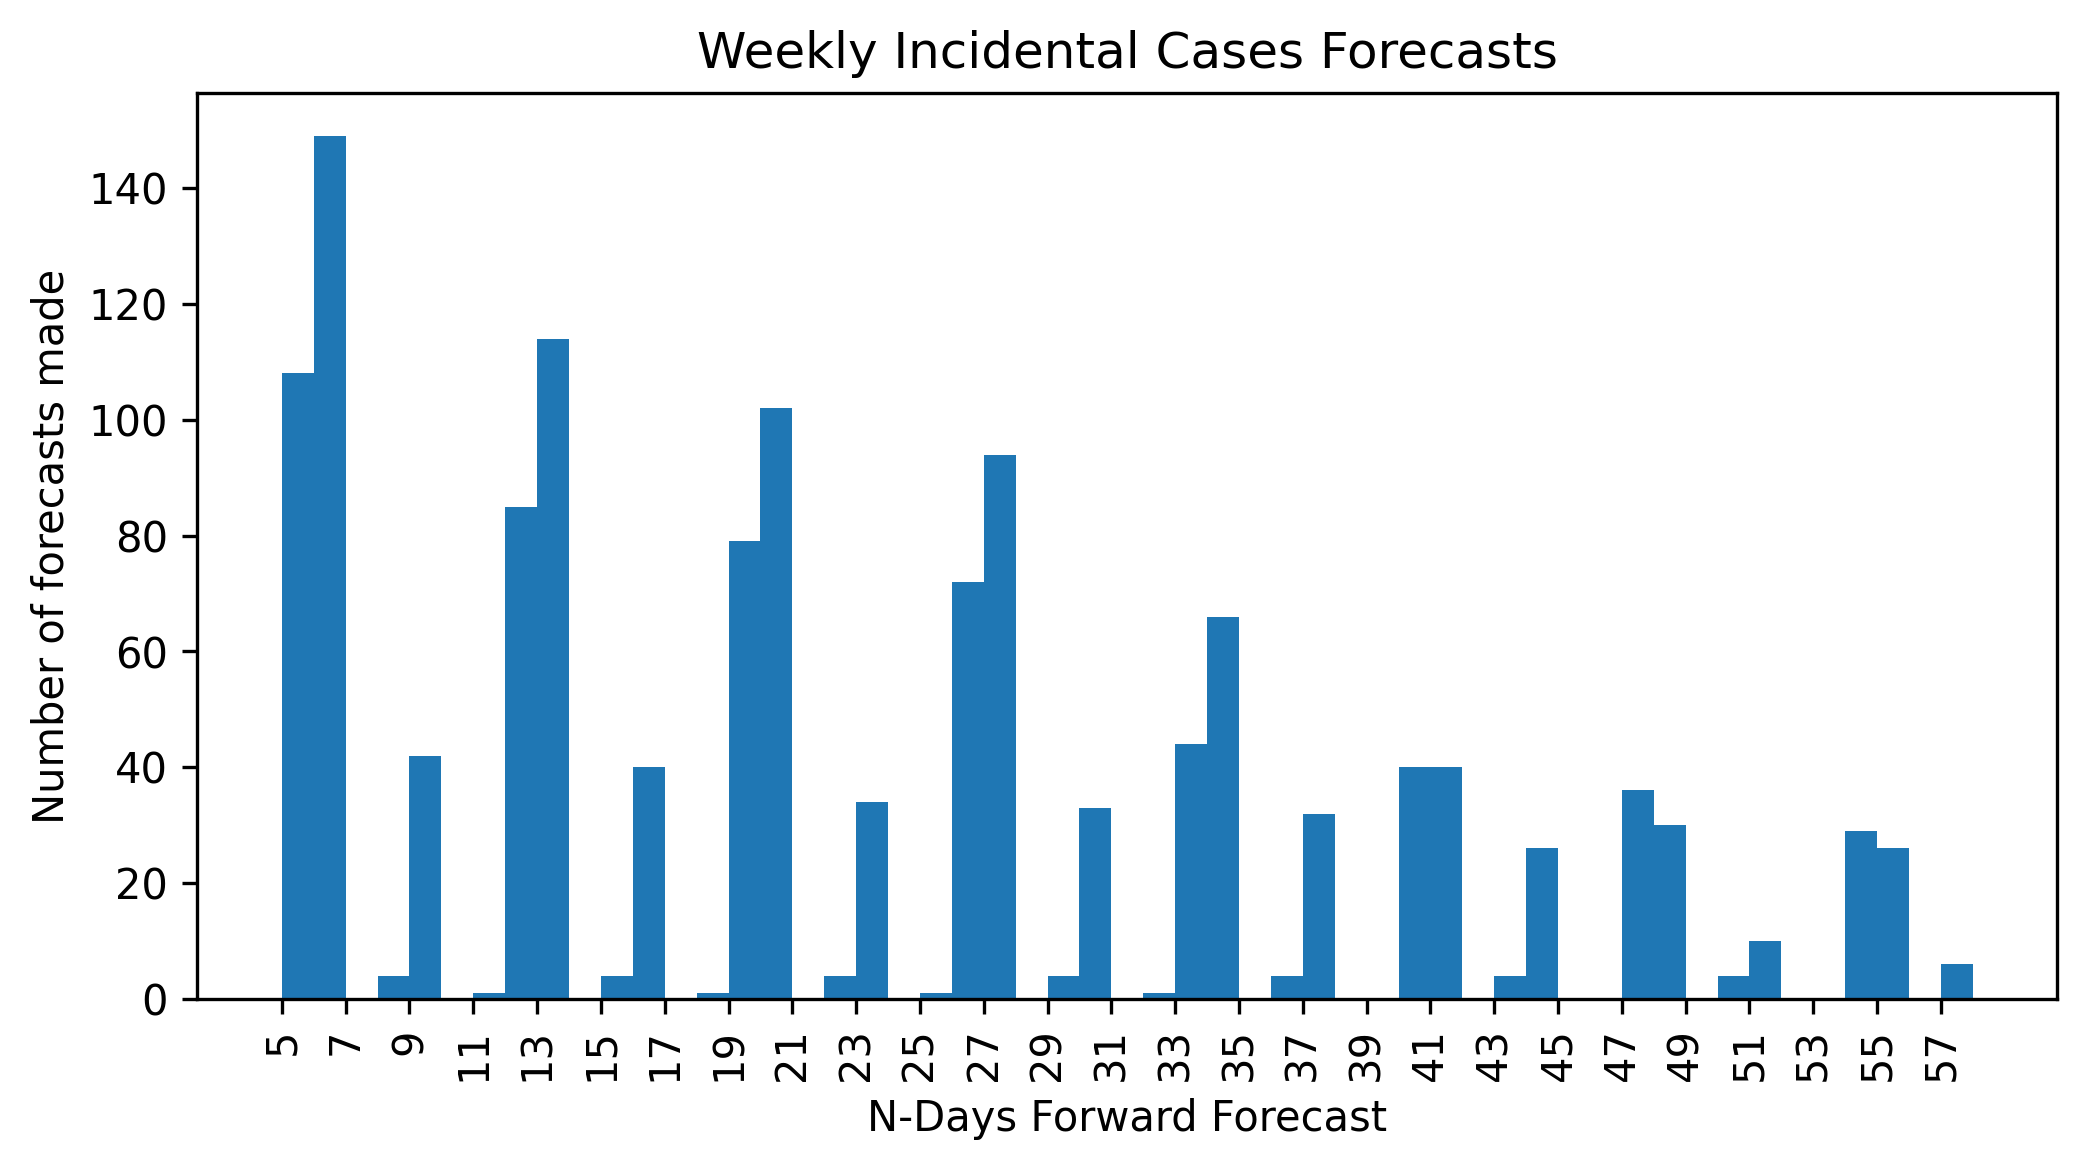

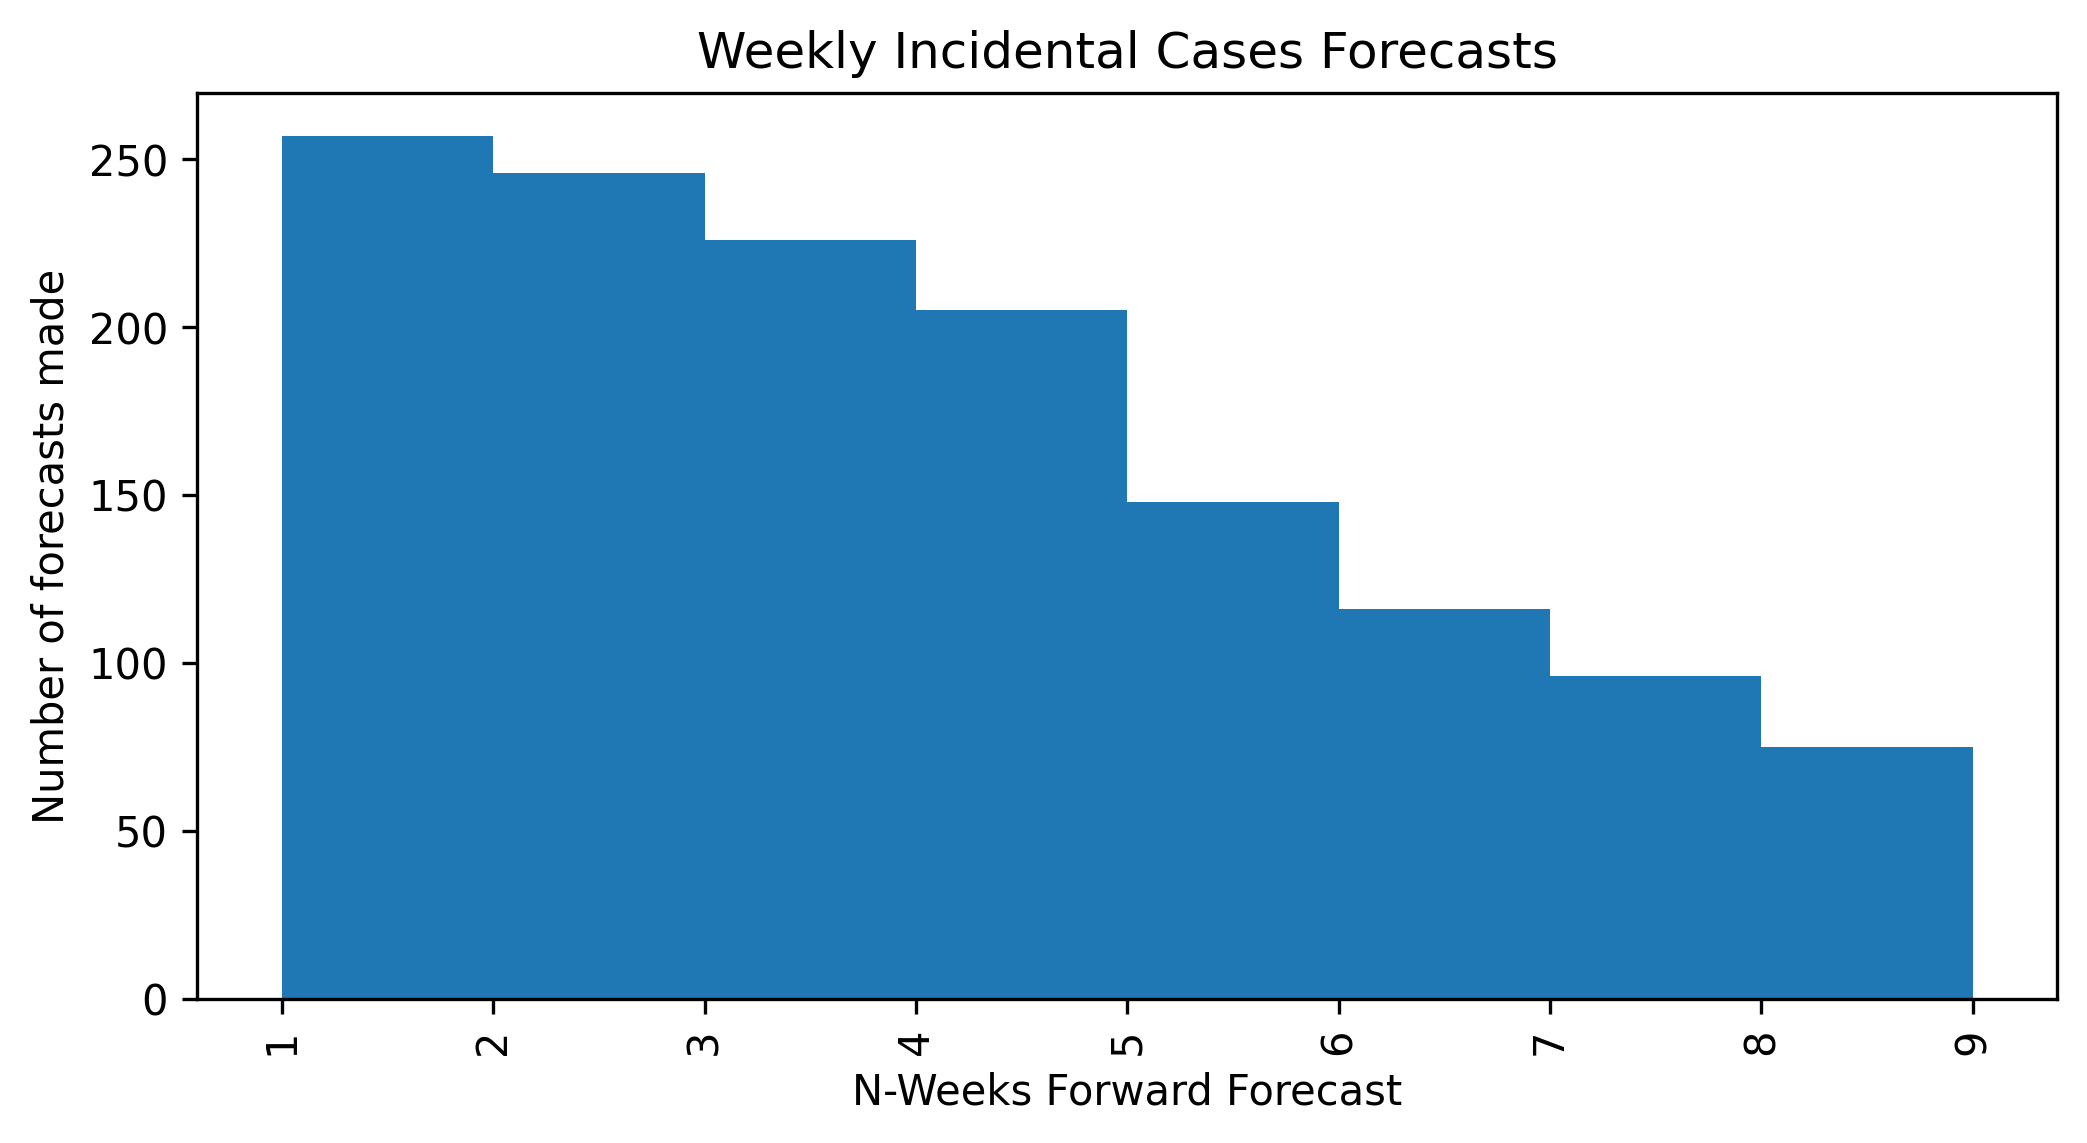

In [25]:
S19.plotallscoresdist(ScoreboardCases,figuresdirectory,'Case')

In [26]:
int(ScoreboardCases['deltaW'].max())

9

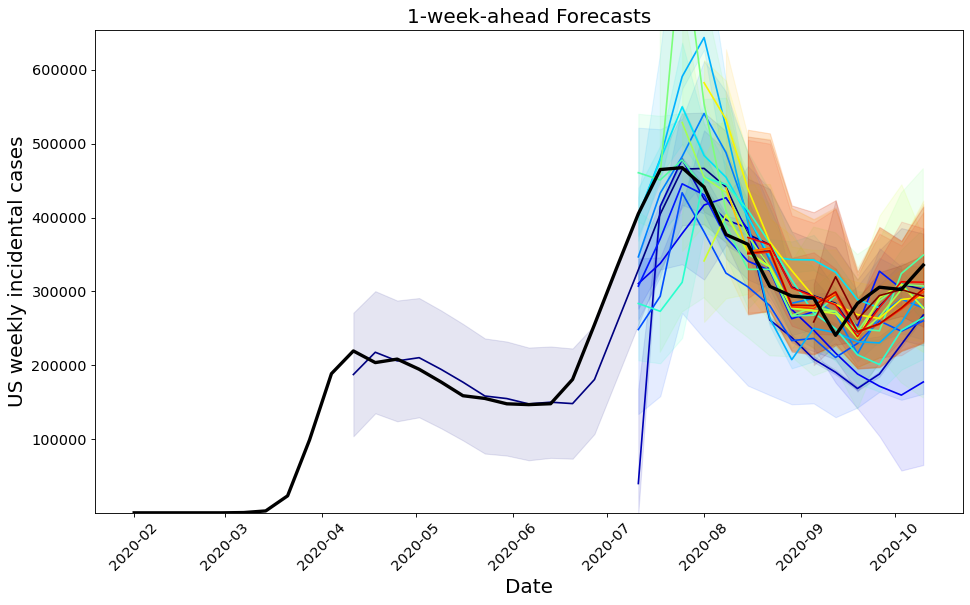

In [27]:
S19.plotlongitudinalALL(US_cases,ScoreboardCases,'Cases',1)

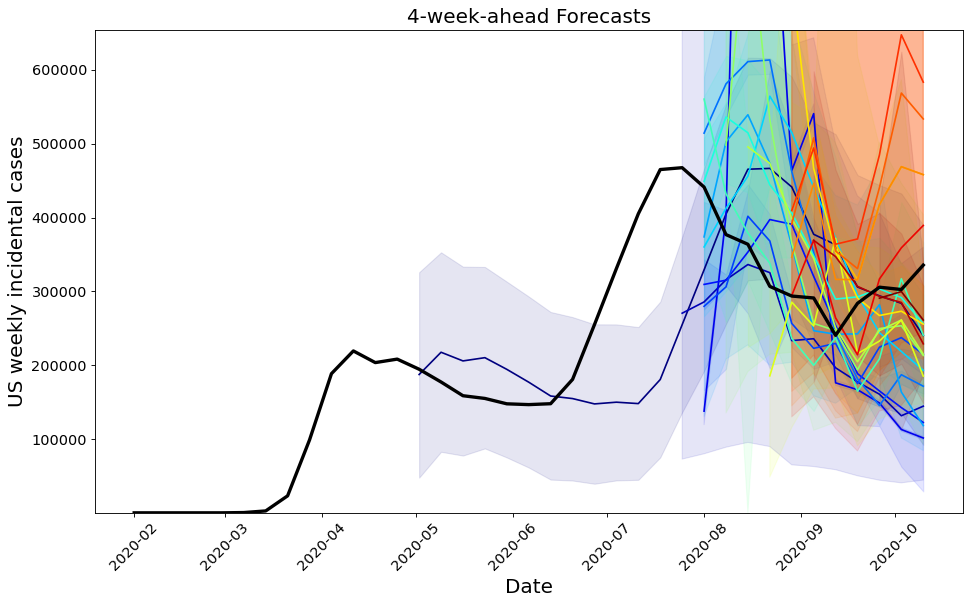

In [28]:
S19.plotlongitudinalALL(US_cases,ScoreboardCases,'Cases',4)

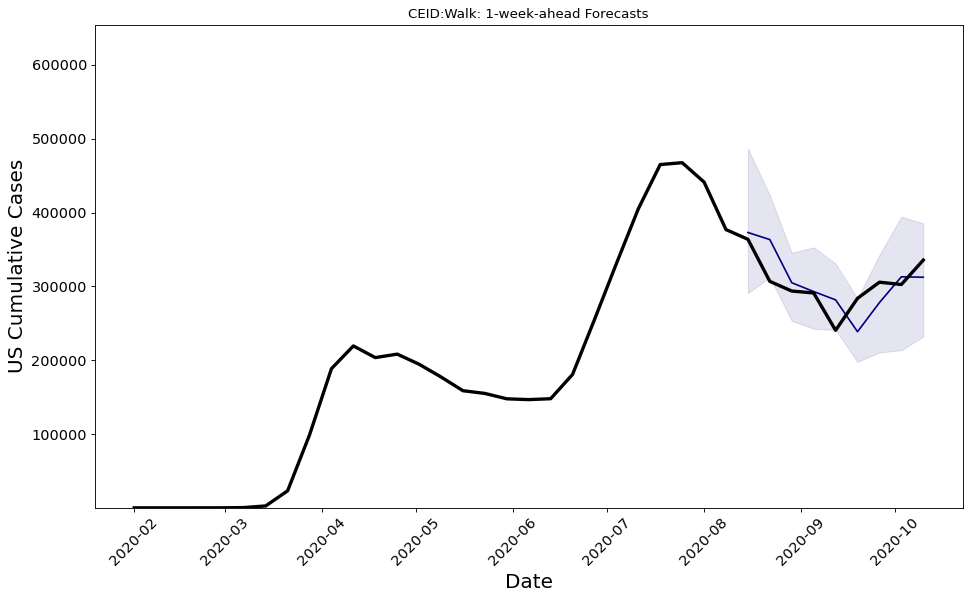

In [29]:
S19.plotlongitudinal(US_cases,ScoreboardCases,'Cases',1,'CEID:Walk')

## BUILD SCOREBOARD FOR CUMULATIVE DEATHS

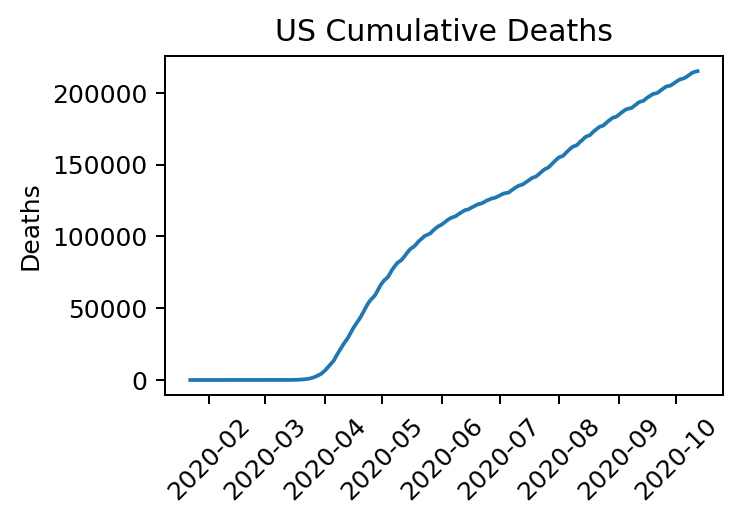

In [30]:
US_deaths = S19.readobserveddeaths()
S19.plotUSCumDeaths(US_deaths)

In [31]:
FirstForecasts = S19.getscoreboard(US_deaths,'Death','../Data/ScoreboardDeaths.pkl')

100%|██████████| 5948/5948 [03:00<00:00, 32.97it/s] 


/home/osman.yogurtcu/anaconda3/lib/python3.7/site-packages/numpy/lib/histograms.py:839: RuntimeWarning: invalid value encountered in greater_equal
  keep = (tmp_a >= first_edge)
/home/osman.yogurtcu/anaconda3/lib/python3.7/site-packages/numpy/lib/histograms.py:840: RuntimeWarning: invalid value encountered in less_equal
  keep &= (tmp_a <= last_edge)


Maximum % conversion error:
2.5793983820063593
Unique models in the scoreboard:
0. Imperial:ensemble2
1. Imperial:ensemble1
2. IHME:CurveFit
3. COVIDhub:baseline
4. CU:scenario_high
5. CU:nochange
6. CU:select
7. CU:scenario_mid
8. CU:scenario_low
9. UMass:ExpertCrowd
10. COVIDhub:ensemble
11. MOBS:GLEAM_COVID
12. YYG:ParamSearch
13. UT:Mobility
14. JHU_IDD:CovidSP
15. LANL:GrowthRate
16. CovidAnalytics:DELPHI
17. IowaStateLW:STEM
18. UCLA:SuEIR
19. GT:DeepCOVID
20. UMass:MechBayes
21. PSI:DRAFT
22. UA:EpiCovDA
23. Covid19Sim:Simulator
24. USACE:ERDC_SEIR
25. SWC:TerminusCM
26. Auquan:SEIR
27. CovidActNow:SEIR_CAN
28. OliverWyman:Navigator
29. epiforecasts:ensemble1
30. NotreDame:mobility
31. MITCovAlliance:SIR
32. QJHong:Encounter
33. Columbia_UNC:SurvCon
34. UMich:RidgeTfReg
35. RobertWalraven:ESG
36. UCM_MESALab:FoGSEIR
37. Karlen:pypm
38. DDS:NBDS
39. RPI_UW:Mob_Collision
40. CEID:Walk
41. LNQ:ens1
42. WalmartLabsML:LogForecasting
43. SteveMcConnell:CovidComplete
44. JHUAPL:Bucky
4

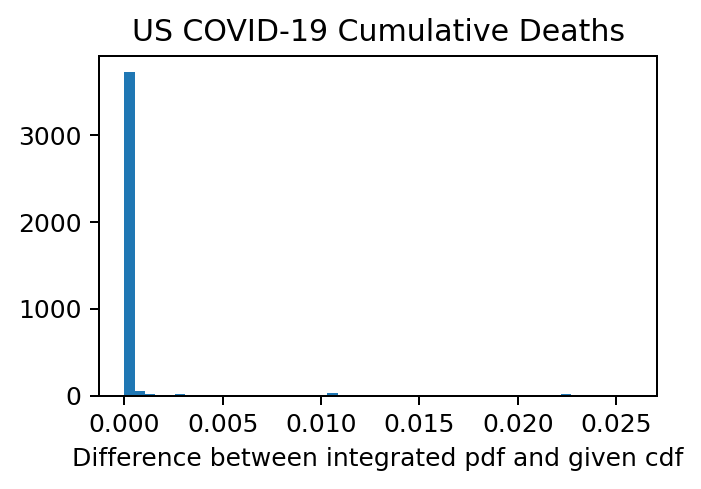

In [33]:
ScoreboardDeaths = pd.read_pickle('../Data/ScoreboardDeaths.pkl')
S19.plotdifferencescdfpdf(ScoreboardDeaths,'Death')
modeltypesDeaths = S19.getmodeltypes(ScoreboardDeaths)

In [34]:
%%capture cap --no-stderr
themodels = ScoreboardDeaths['model'].unique()
for i in range(0,len(themodels)):
    print(themodels[i])

In [35]:
#Writing out all the models in the scoreboard into a text file
with open('../CUMDEATH_Models.txt', 'w') as f:
    f.write(cap.stdout)

In [36]:
#Eliminate scores that do not have the proper score quantiles
delete_row = ScoreboardDeaths[ScoreboardDeaths["proper"]==False].index
ScoreboardDeaths.drop(delete_row,inplace=True)

<Figure size 2400x1200 with 0 Axes>

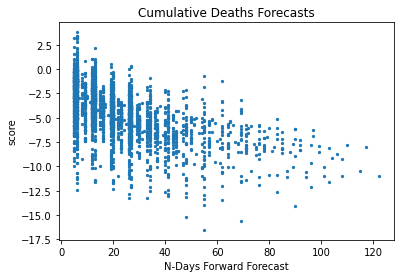

<Figure size 2400x1200 with 0 Axes>

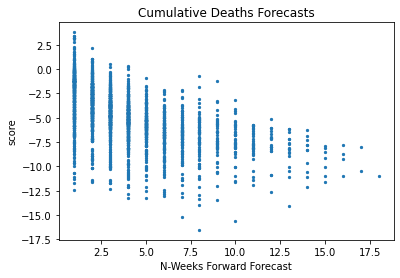

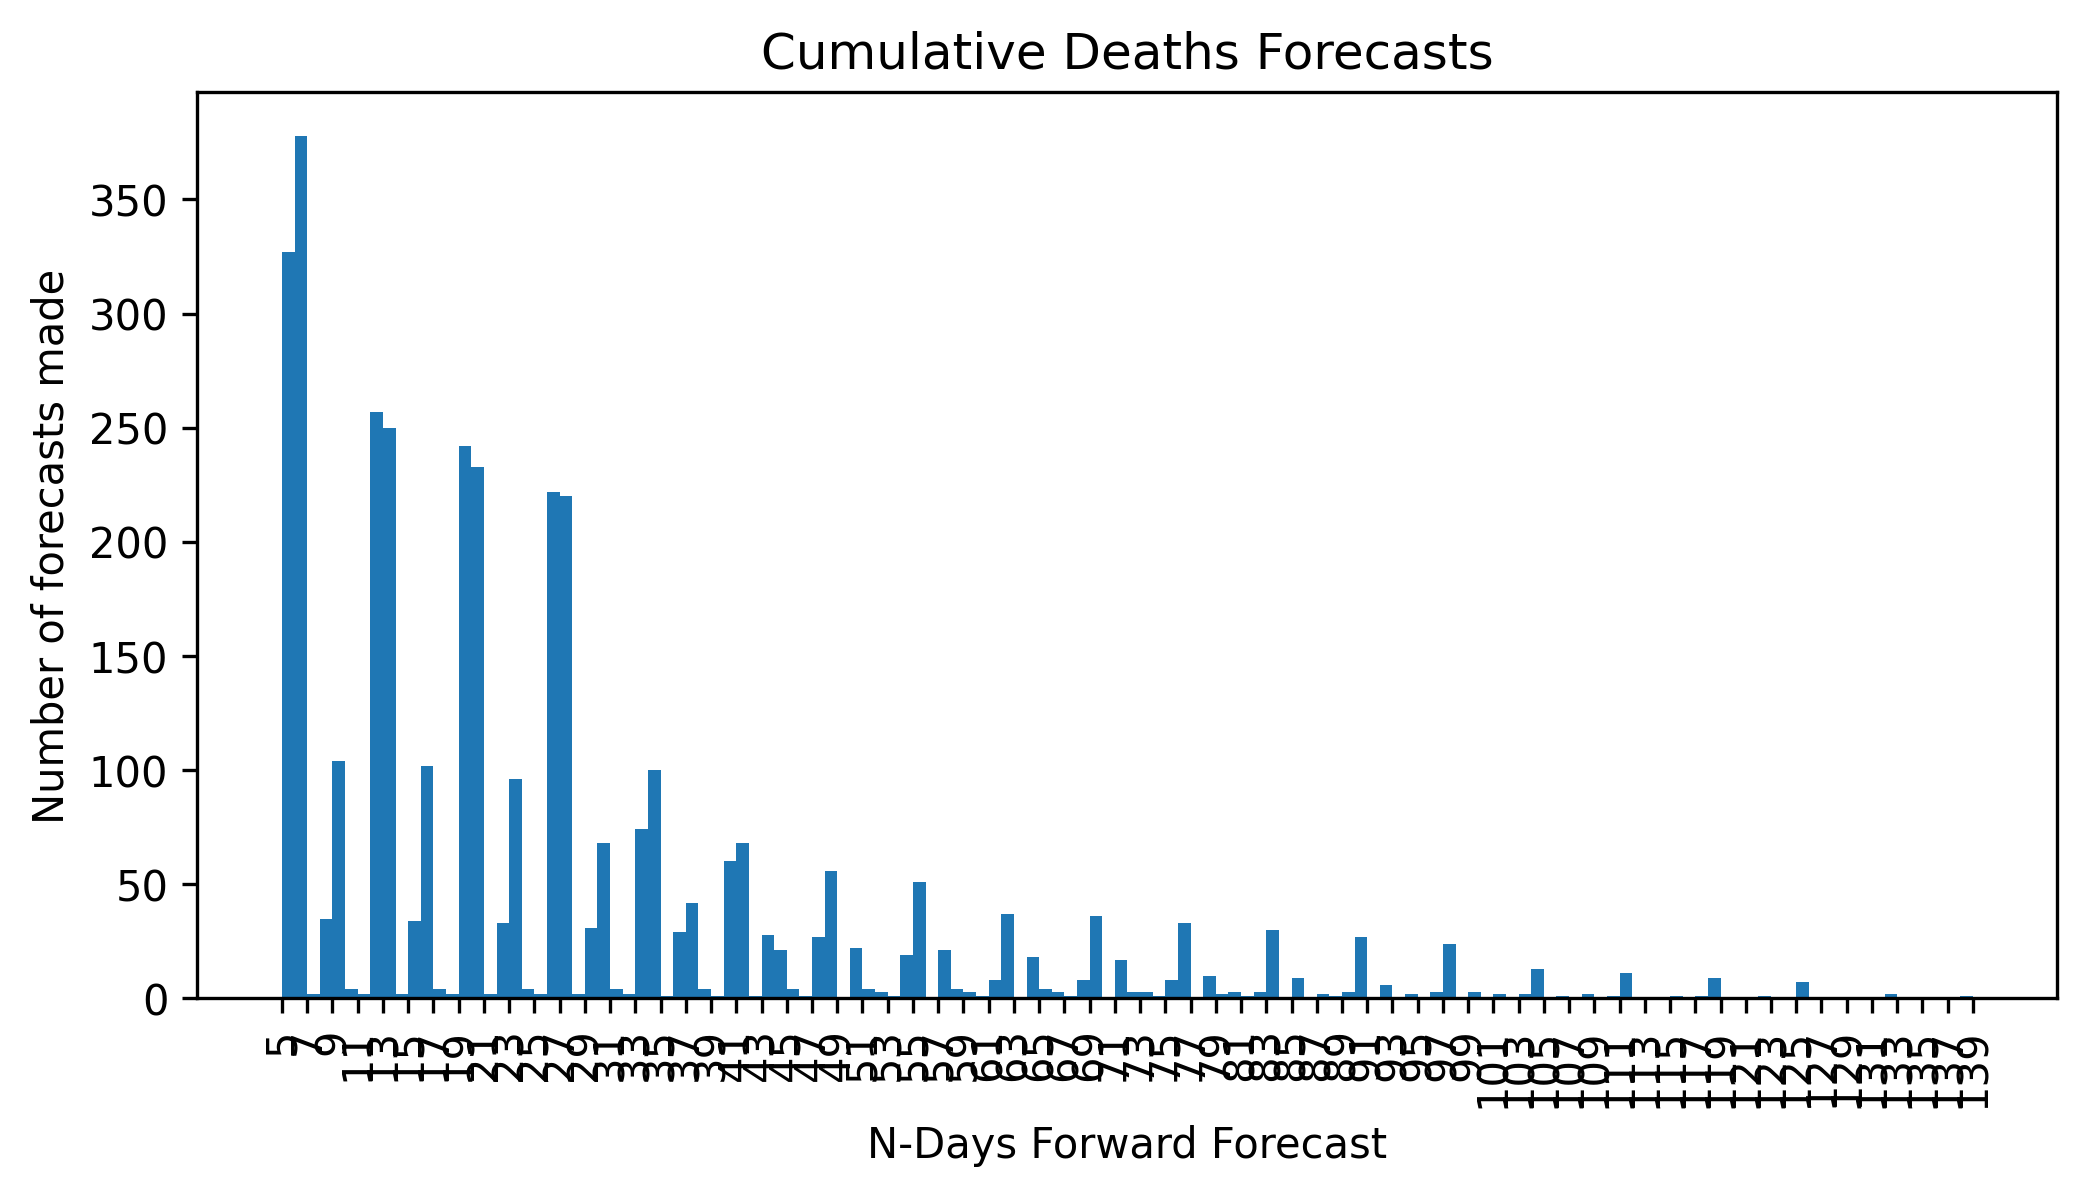

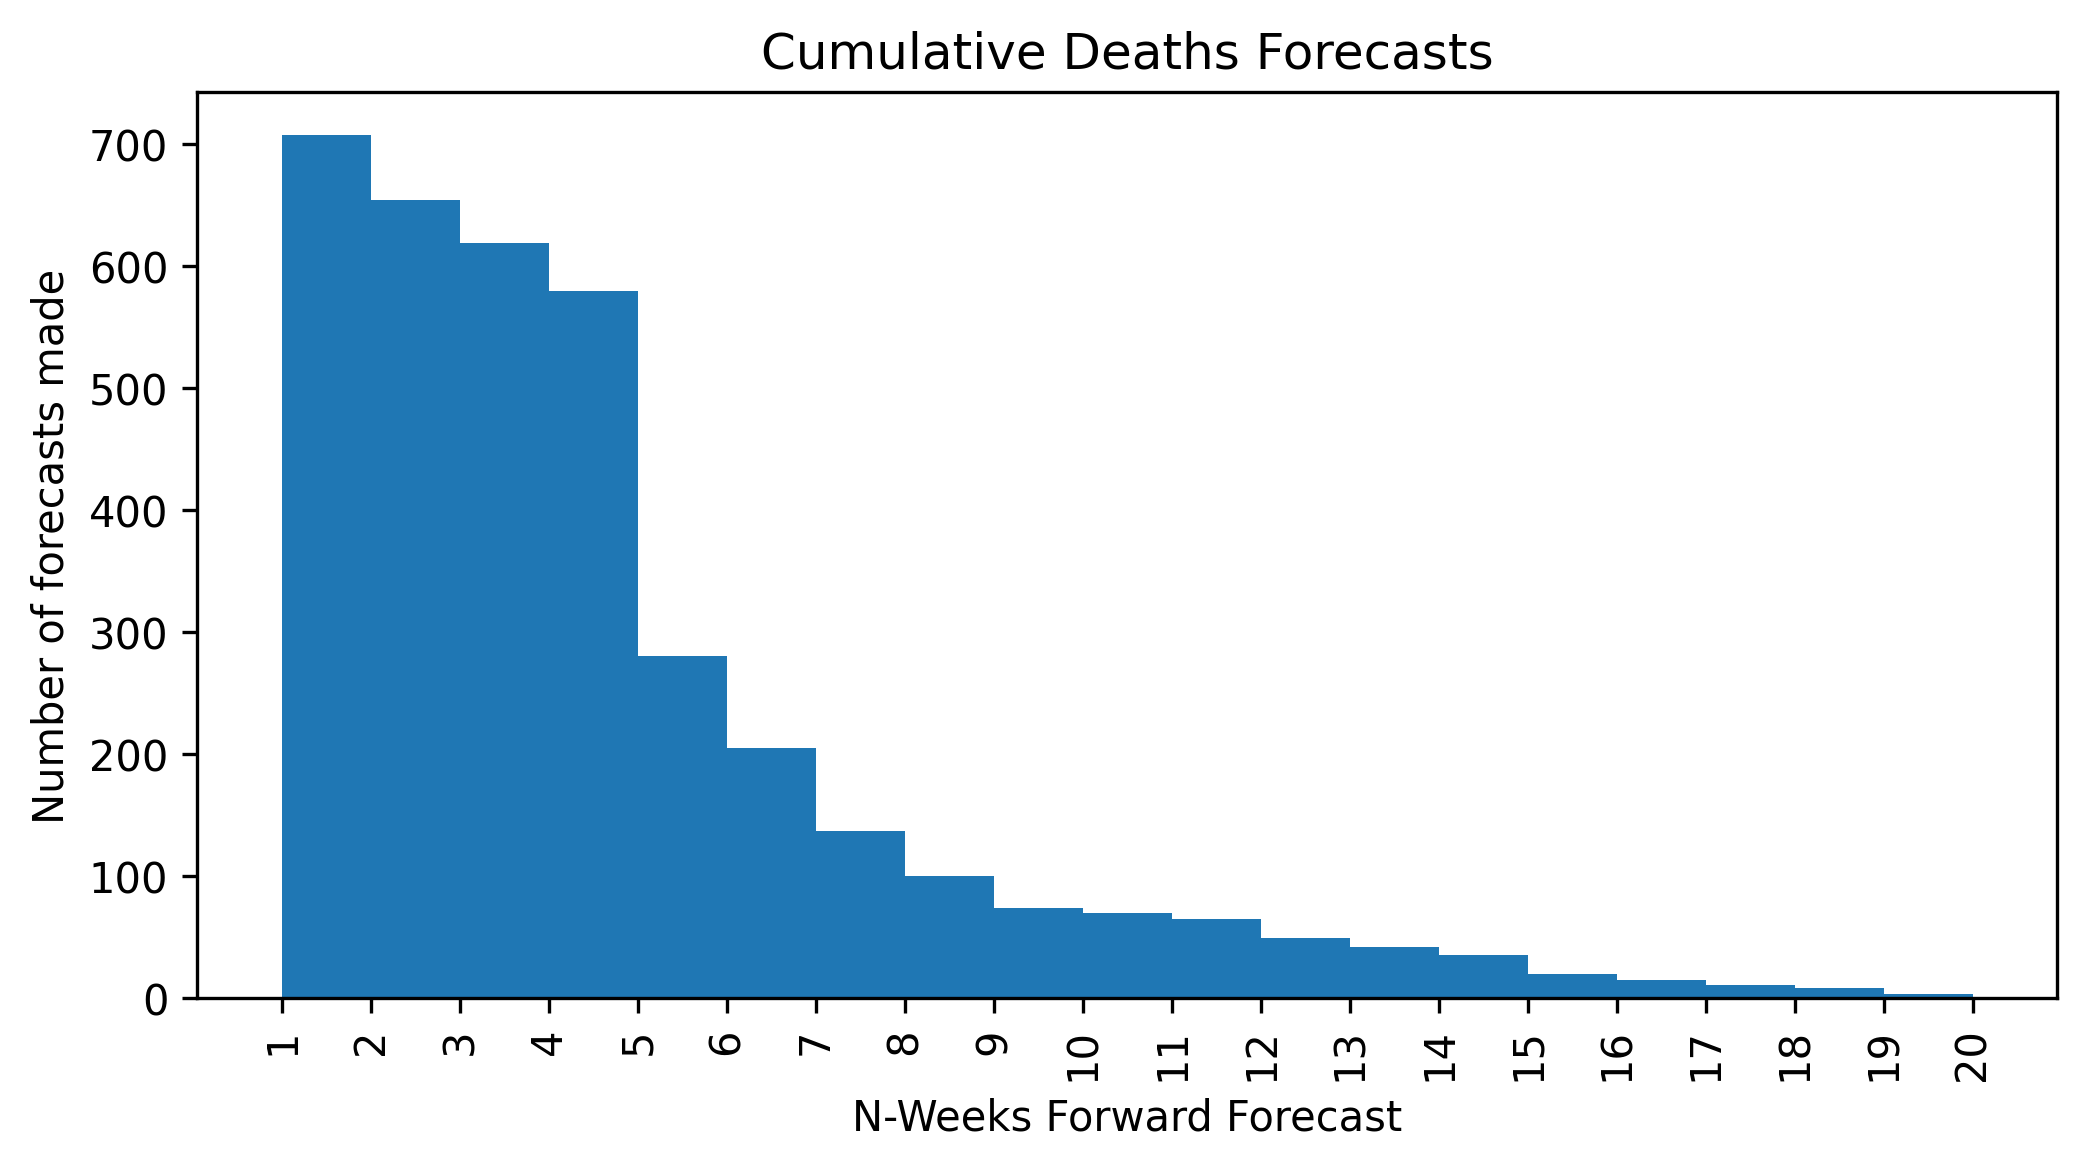

In [37]:
S19.plotallscoresdist(ScoreboardDeaths,figuresdirectory,'Death')

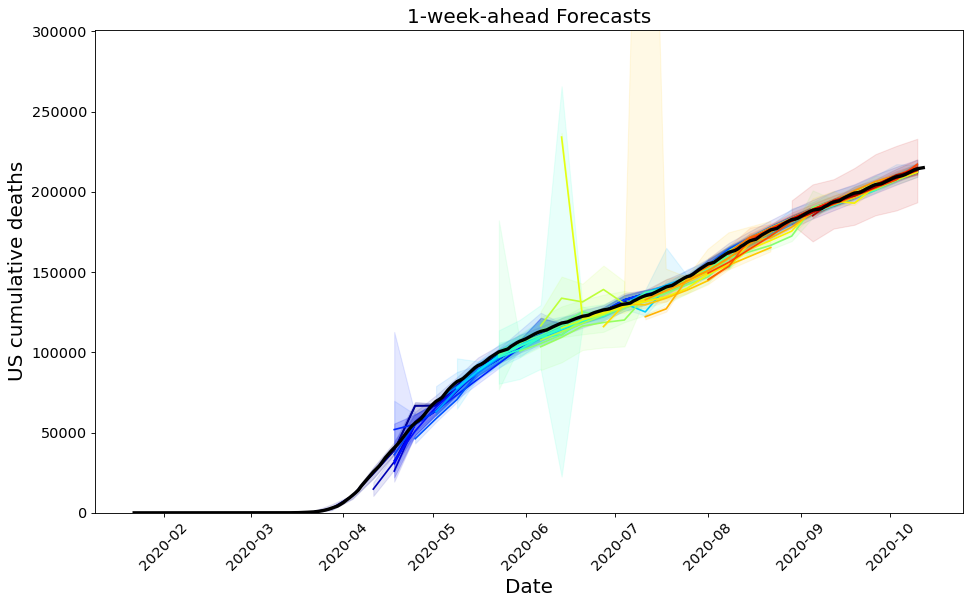

In [38]:
S19.plotlongitudinalALL(US_deaths,ScoreboardDeaths,'Deaths',1)

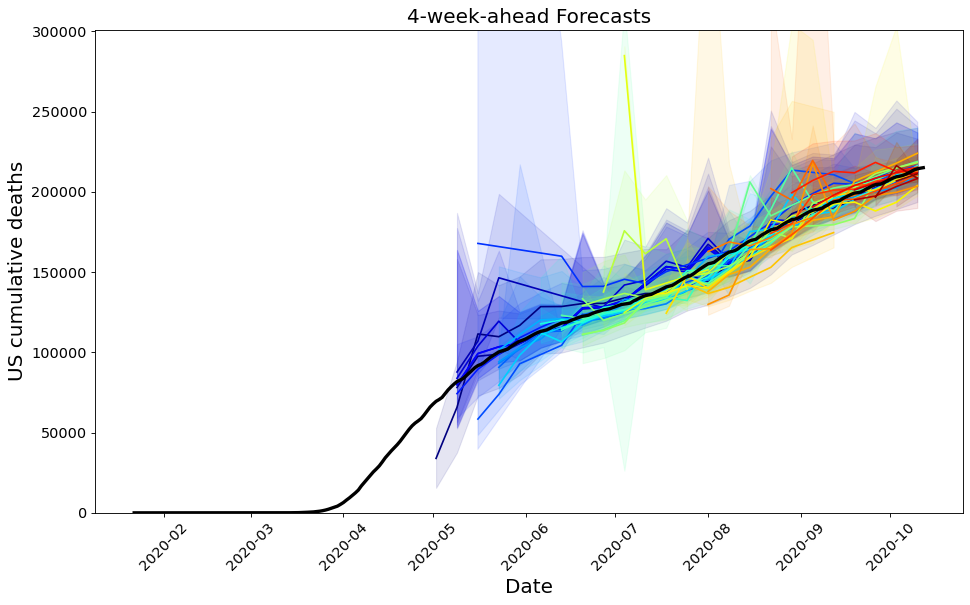

In [39]:
S19.plotlongitudinalALL(US_deaths,ScoreboardDeaths,'Deaths',4)

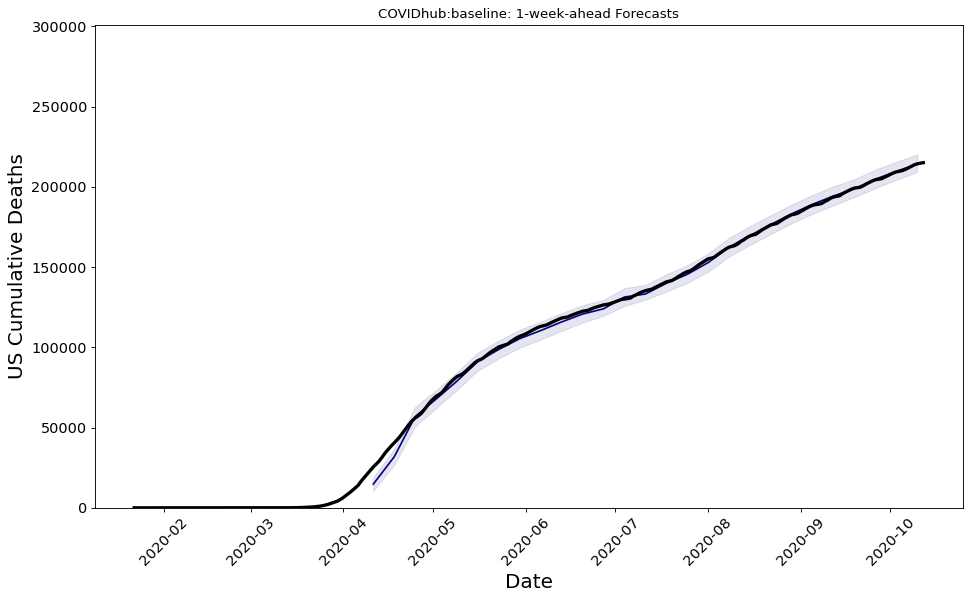

In [40]:
S19.plotlongitudinal(US_deaths,ScoreboardDeaths,'Deaths',1,'COVIDhub:baseline')

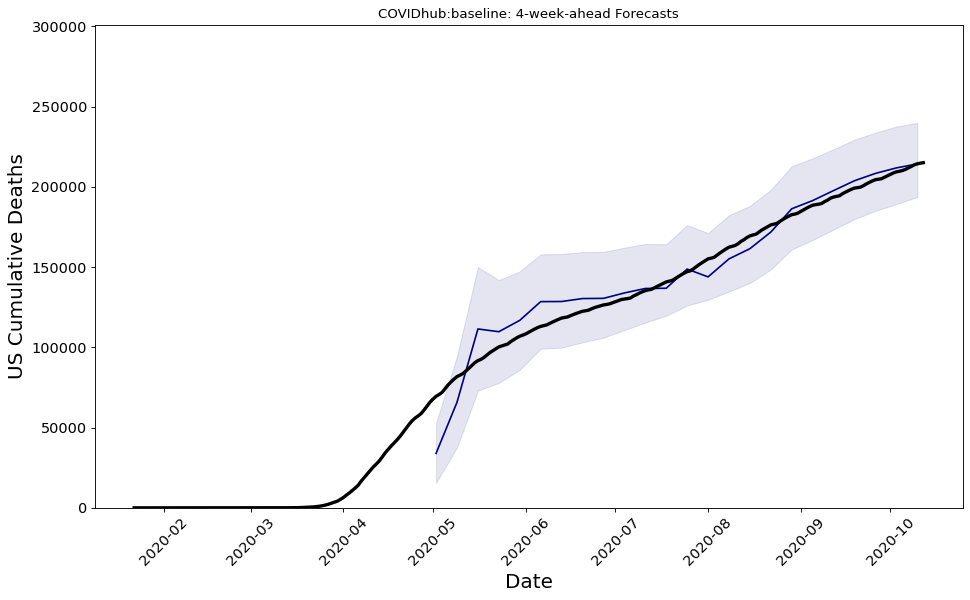

In [41]:
S19.plotlongitudinal(US_deaths,ScoreboardDeaths,'Deaths',4,'COVIDhub:baseline')

# UNWEIGHTED FORECASTING

/home/osman.yogurtcu/Documents/Projects/Python/Scoreboard/Scoreboard19/scoresplots.py:244: RuntimeWarning: Mean of empty slice
  as_index=False)[['score']].agg(lambda x: np.nanmean(x)))
/home/osman.yogurtcu/Documents/Projects/Python/Scoreboard/Scoreboard19/scoresplots.py:244: RuntimeWarning: Mean of empty slice
  as_index=False)[['score']].agg(lambda x: np.nanmean(x)))
/home/osman.yogurtcu/Documents/Projects/Python/Scoreboard/Scoreboard19/scoresplots.py:244: RuntimeWarning: Mean of empty slice
  as_index=False)[['score']].agg(lambda x: np.nanmean(x)))


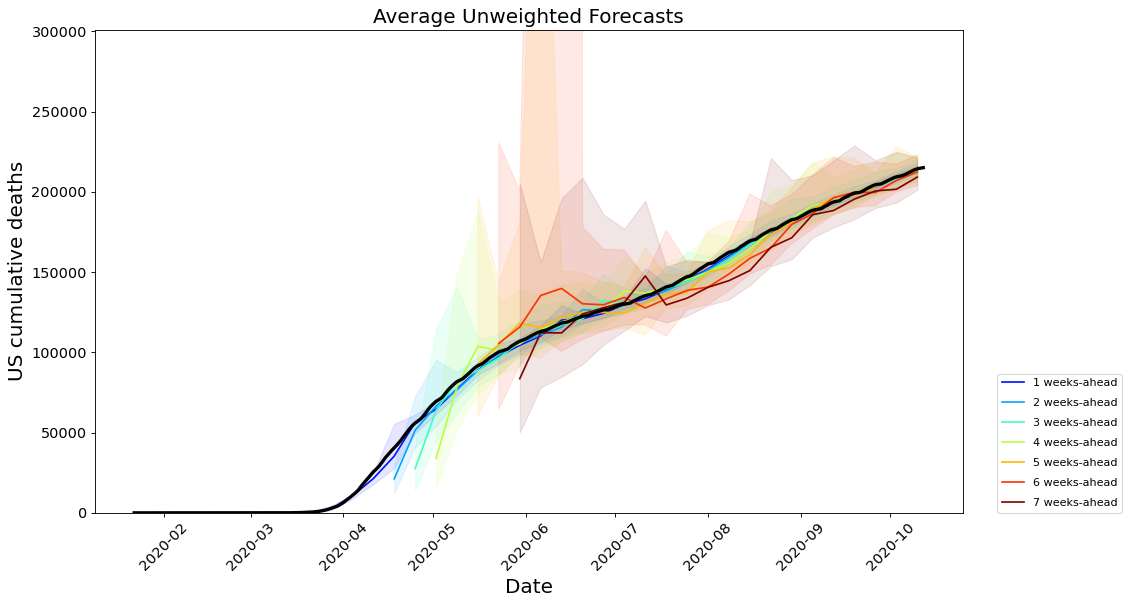

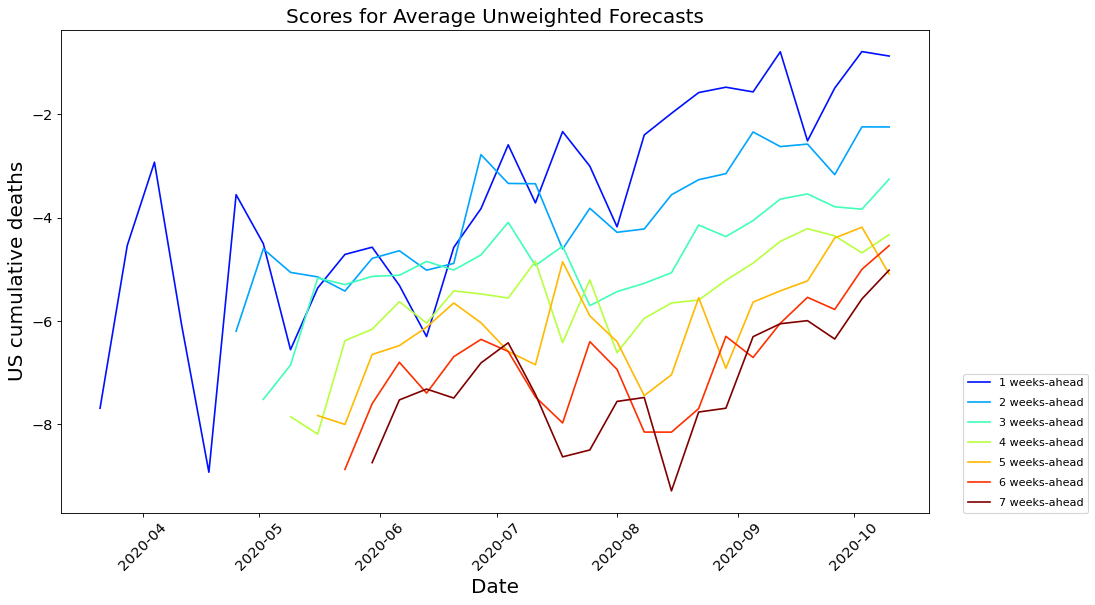

In [42]:
S19.plotlongitudinalUNWEIGHTED(US_deaths,ScoreboardDeaths,'Deaths',7)

/home/osman.yogurtcu/Documents/Projects/Python/Scoreboard/Scoreboard19/scoresplots.py:244: RuntimeWarning: Mean of empty slice
  as_index=False)[['score']].agg(lambda x: np.nanmean(x)))
/home/osman.yogurtcu/Documents/Projects/Python/Scoreboard/Scoreboard19/scoresplots.py:244: RuntimeWarning: Mean of empty slice
  as_index=False)[['score']].agg(lambda x: np.nanmean(x)))
/home/osman.yogurtcu/Documents/Projects/Python/Scoreboard/Scoreboard19/scoresplots.py:244: RuntimeWarning: Mean of empty slice
  as_index=False)[['score']].agg(lambda x: np.nanmean(x)))
/home/osman.yogurtcu/Documents/Projects/Python/Scoreboard/Scoreboard19/scoresplots.py:244: RuntimeWarning: Mean of empty slice
  as_index=False)[['score']].agg(lambda x: np.nanmean(x)))
/home/osman.yogurtcu/Documents/Projects/Python/Scoreboard/Scoreboard19/scoresplots.py:244: RuntimeWarning: Mean of empty slice
  as_index=False)[['score']].agg(lambda x: np.nanmean(x)))
/home/osman.yogurtcu/Documents/Projects/Python/Scoreboard/Scoreboard19

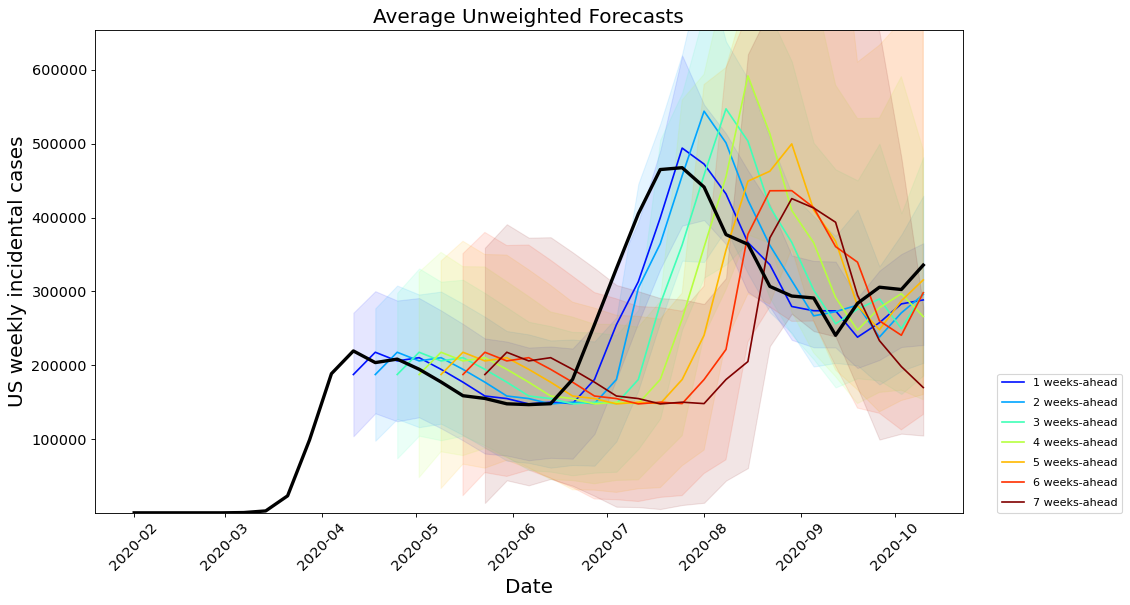

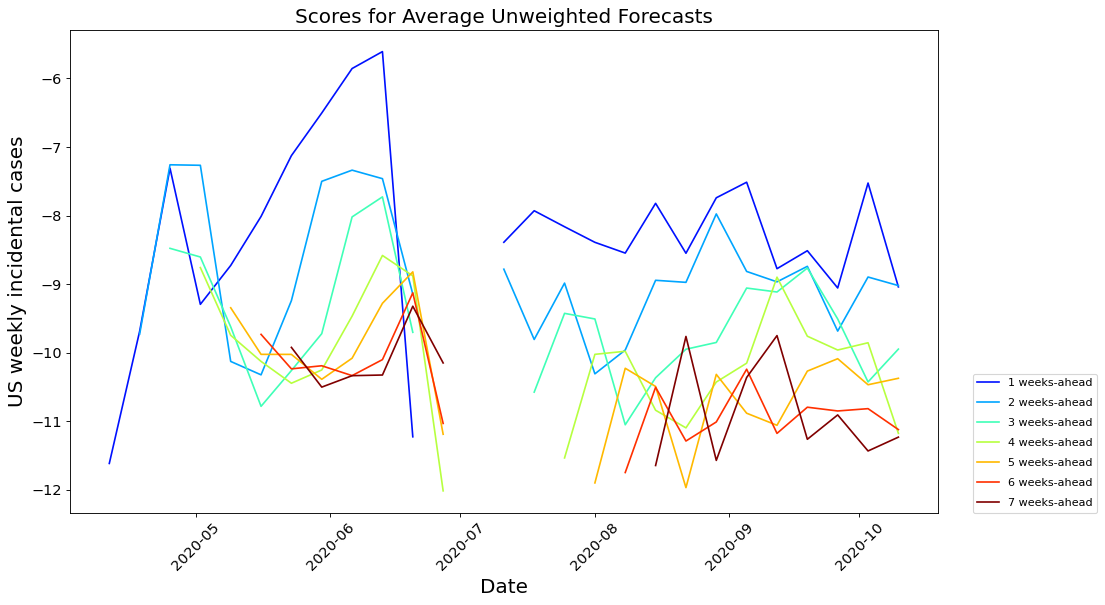

In [43]:
S19.plotlongitudinalUNWEIGHTED(US_cases,ScoreboardCases,'Cases',7)

# SCORE WEIGHTED FORECASTING

In [ ]:
Scoreboard.replace([np.inf, -np.inf], np.nan,inplace=True)
Scoreboard.dropna(inplace=True)
Scoreboard = Scoreboard.sort_values('forecast_date').drop_duplicates(subset=['model', 'target_end_date'], keep='last').copy()
Scoreboard.reset_index(inplace=True)
#np.median(Scoreboard["value"].to_list())
# pd.DataFrame(Scoreboard['quantile'].to_list()).idxmax(axis=1)
# pd.DataFrame(Scoreboard['quantile'].to_list()).idxmin(axis=1)
Scoreboard['score'] = 1
Scoreboard['CIHI']=pd.DataFrame(Scoreboard['value'].to_list()).max(axis=1)
Scoreboard['CILO']=pd.DataFrame(Scoreboard['value'].to_list()).min(axis=1)
Scoreboard['PE']=pd.DataFrame(Scoreboard['value'].to_list()).median(axis=1)
Scoreboard['scorecontr']=np.exp(-Scoreboard['score']/2)
Scoreboard['CIHI_W']=Scoreboard['CIHI']*Scoreboard['scorecontr']
Scoreboard['CILO_W']=Scoreboard['CILO']*Scoreboard['scorecontr']
Scoreboard['PE_W']=Scoreboard['PE']*Scoreboard['scorecontr']
Scoreboard['P_W']=Scoreboard['p']*Scoreboard['scorecontr']
Scoreboard.head(3)

In [ ]:
Scoreboardlate = Scoreboard[Scoreboard['forecast_date']>='2020-07-01'].copy()
Scoreboardlate.head(3)

In [ ]:
frozenscores = Scoreboard[Scoreboard['forecast_date']<'2020-07-01'].groupby('model')['score'].mean().reset_index()
frozenscores
rename_dict = frozenscores.set_index('model').to_dict()['score']

Scoreboardlate['score'] = np.nan
Scoreboardlate['score'] = Scoreboardlate.set_index(['model']).index.map(rename_dict.get)
Scoreboardlate.dropna(inplace=True)

Scoreboardlate.replace([np.inf, -np.inf], np.nan,inplace=True)
Scoreboardlate['scorecontr']=np.exp(-Scoreboardlate['score']/2)
Scoreboardlate['CIHI_W']=Scoreboardlate['CIHI']*Scoreboardlate['scorecontr']
Scoreboardlate['CILO_W']=Scoreboardlate['CILO']*Scoreboardlate['scorecontr']
Scoreboardlate['PE_W']=Scoreboardlate['PE']*Scoreboardlate['scorecontr']
Scoreboardlate['P_W']=Scoreboardlate['p']*Scoreboardlate['scorecontr']

In [ ]:
# Scoreboard.to_csv('Scoreboard.csv')
scoreweighted = (Scoreboardlate.groupby(['target_end_date'],
                                        as_index=False)[['scorecontr','CIHI_W','CILO_W','PE_W', 'P_W','deaths']].agg(lambda x: list(x)))
scoreweighted['sumW']=pd.DataFrame(scoreweighted['scorecontr'].to_list()).sum(axis=1)
scoreweighted['avgCIHI']=pd.DataFrame(scoreweighted['CIHI_W'].to_list()).sum(axis=1)/scoreweighted['sumW']
scoreweighted['avgCILO']=pd.DataFrame(scoreweighted['CILO_W'].to_list()).sum(axis=1)/scoreweighted['sumW']
scoreweighted['avgPE']=pd.DataFrame(scoreweighted['PE_W'].to_list()).sum(axis=1)/scoreweighted['sumW']
scoreweighted['avgP']=2*np.log(pd.DataFrame(scoreweighted['P_W'].to_list()).sum(axis=1)/scoreweighted['sumW'])+1+np.log(pd.DataFrame(scoreweighted['deaths'].to_list()).min(axis=1))+np.log(2*np.pi)
scoreweighted.to_csv('ScorelateWeightedProj.csv')

In [ ]:
# Scoreboard.to_csv('Scoreboard.csv')
scoreweighted = (Scoreboard.groupby(['target_end_date'],
                                        as_index=False)[['scorecontr','CIHI_W','CILO_W','PE_W', 'P_W','deaths']].agg(lambda x: list(x)))
scoreweighted['sumW']=pd.DataFrame(scoreweighted['scorecontr'].to_list()).sum(axis=1)
scoreweighted['avgCIHI']=pd.DataFrame(scoreweighted['CIHI_W'].to_list()).sum(axis=1)/scoreweighted['sumW']
scoreweighted['avgCILO']=pd.DataFrame(scoreweighted['CILO_W'].to_list()).sum(axis=1)/scoreweighted['sumW']
scoreweighted['avgPE']=pd.DataFrame(scoreweighted['PE_W'].to_list()).sum(axis=1)/scoreweighted['sumW']
scoreweighted['avgP']=2*np.log(pd.DataFrame(scoreweighted['P_W'].to_list()).sum(axis=1)/scoreweighted['sumW'])+1+np.log(pd.DataFrame(scoreweighted['deaths'].to_list()).min(axis=1))+np.log(2*np.pi)
scoreweighted.to_csv('ScoreWeightedProj.csv')

In [ ]:
plt.figure(num=None, figsize=(14, 8), dpi=80, facecolor='w', edgecolor='k')
models = Scoreboard['model'].unique()
colors = pl.cm.jet(np.linspace(0,1,len(models)))
i = 10
#for curmod in models:
curmod = 'Score Weighted Ensemble'    
dates = scoreweighted.target_end_date
P = scoreweighted.avgP
# CIlow = scoreweighted.avgCILO
# CIhi = scoreweighted.avgCIHI

modcol = (colors[i].tolist()[0],
          colors[i].tolist()[1],
          colors[i].tolist()[2])

#plt.plot(US_deaths['DateObserved'],US_deaths['Deaths'],color='k',linewidth=7.0,label='Observed')    

plt.plot(dates,P,color=modcol,label=curmod,linewidth=4.0)
# plt.fill_between(dates, CIlow, CIhi, color=modcol, alpha=.1)

# plt.ylim([0,260000])
plt.ylabel('Score: US Cumulative Deaths', fontsize=18)
plt.xlabel('Date', fontsize=18)
plt.xticks(rotation=45, fontsize=13)
plt.yticks(fontsize=13)
plt.legend(loc='upper left')
plt.fmt_xdata = mdates.DateFormatter('%m-%d')
plt.savefig(gitdir+'Figures/Projections/Score_ScoreWeighted4wkAhead_CUMDEATH.png',
            dpi=300,
           bbox_inches = 'tight')

In [ ]:
plt.figure(num=None, figsize=(14, 8), dpi=80, facecolor='w', edgecolor='k')
models = Scoreboard['model'].unique()
colors = pl.cm.jet(np.linspace(0,1,len(models)))
i = 10
#for curmod in models:
curmod = 'Score Weighted Ensemble'    
dates = scoreweighted.target_end_date
PE = scoreweighted.avgPE
CIlow = scoreweighted.avgCILO
CIhi = scoreweighted.avgCIHI

modcol = (colors[i].tolist()[0],
          colors[i].tolist()[1],
          colors[i].tolist()[2])

plt.plot(US_deaths['DateObserved'],US_deaths['Deaths'],color='k',linewidth=7.0,label='Observed')    

plt.plot(dates,PE,color=modcol,label=curmod,linewidth=4.0)
plt.fill_between(dates, CIlow, CIhi, color=modcol, alpha=.1)

plt.axvline(x=datetime.strptime('Jul 01 2020', '%b %d %Y'),color='r',linestyle='dashed',label='Scoring phase completed')

plt.ylim([0,260000])
plt.ylabel('US Cumulative Deaths', fontsize=18)
plt.xlabel('Date', fontsize=18)
plt.xticks(rotation=45, fontsize=13)
plt.yticks(fontsize=13)
plt.legend(loc='upper left')
plt.fmt_xdata = mdates.DateFormatter('%m-%d')
plt.savefig(gitdir+'Figures/Projections/ScoreWeighted4wkAhead_CUMDEATH.png',
            dpi=300,
           bbox_inches = 'tight')

In [ ]:
Scoreboardx = Scoreboard[(Scoreboard['forecast_date'] > '2020-06-27') & (Scoreboard['forecast_date'] < '2020-07-01')].copy()
Scoreboardx.reset_index(inplace=True)
#np.median(Scoreboard["value"].to_list())
# pd.DataFrame(Scoreboard['quantile'].to_list()).idxmax(axis=1)
# pd.DataFrame(Scoreboard['quantile'].to_list()).idxmin(axis=1)
Scoreboardx['CIHI']=pd.DataFrame(Scoreboardx['value'].to_list()).max(axis=1)
Scoreboardx['CILO']=pd.DataFrame(Scoreboardx['value'].to_list()).min(axis=1)
Scoreboardx['PE']=pd.DataFrame(Scoreboardx['value'].to_list()).median(axis=1)
Scoreboardxx = Scoreboardx.sort_values('forecast_date').drop_duplicates(subset=['model', 'target_end_date'], keep='last').copy()
Scoreboardxx.reset_index(inplace=True)
Scoreboardxx.sort_values(by=['target_end_date'],inplace=True)
# Scoreboardx.head(3)

plt.figure(num=None, figsize=(14, 8), dpi=80, facecolor='w', edgecolor='k')
models = Scoreboardxx['model'].unique()
colors = pl.cm.jet(np.linspace(0,1,len(models)))
i = 0
for curmod in models:
    
    dates = Scoreboardxx[Scoreboardxx['model']==curmod].target_end_date
    PE = Scoreboardxx[Scoreboardxx['model']==curmod].PE
    CIlow = Scoreboardxx[Scoreboardxx['model']==curmod].CILO
    CIhi = Scoreboardxx[Scoreboardxx['model']==curmod].CIHI
    
    modcol = (colors[i].tolist()[0],
              colors[i].tolist()[1],
              colors[i].tolist()[2])
    
    plt.plot(dates,PE,color=modcol,label=curmod,linewidth=4.0)
    #plt.fill_between(dates, CIlow, CIhi, color=modcol, alpha=.1)
    i = i+1

plt.axvline(x=datetime.strptime('Jun 28 2020', '%b %d %Y'),color='r',linestyle='dashed')    
plt.plot(US_deaths['DateObserved'],US_deaths['Deaths'],color='k',linewidth=7.0,label='Observed')    
plt.ylim([0,230000])
plt.ylabel('US Cumulative Deaths', fontsize=18)
plt.xlabel('Date', fontsize=18)
plt.xticks(rotation=45, fontsize=13)
plt.yticks(fontsize=13)
plt.legend(loc=(1.04,0),labelspacing=.9)
plt.fmt_xdata = mdates.DateFormatter('%m-%d')
plt.savefig(gitdir+'Figures/Projections/CUMDEATH_sinceJUN27.png',
            dpi=300,
           bbox_inches = 'tight')

In [ ]:
Scoreboardx = Scoreboard[(Scoreboard['forecast_date'] > '2020-06-27') & (Scoreboard['forecast_date'] < '2020-07-01')].copy()
Scoreboardx.reset_index(inplace=True)
#np.median(Scoreboard["value"].to_list())
# pd.DataFrame(Scoreboard['quantile'].to_list()).idxmax(axis=1)
# pd.DataFrame(Scoreboard['quantile'].to_list()).idxmin(axis=1)
Scoreboardx['CIHI']=pd.DataFrame(Scoreboardx['value'].to_list()).max(axis=1)
Scoreboardx['CILO']=pd.DataFrame(Scoreboardx['value'].to_list()).min(axis=1)
Scoreboardx['PE']=pd.DataFrame(Scoreboardx['value'].to_list()).median(axis=1)
Scoreboardxx = Scoreboardx.sort_values('forecast_date').drop_duplicates(subset=['model', 'target_end_date'], keep='first').copy()
Scoreboardxx.reset_index(inplace=True)
Scoreboardxx.sort_values(by=['target_end_date'],inplace=True)
# Scoreboardx.head(3)

plt.figure(num=None, figsize=(14, 8), dpi=80, facecolor='w', edgecolor='k')
models = Scoreboardxx['model'].unique()
colors = pl.cm.jet(np.linspace(0,1,len(models)))
i = 5
#for curmod in models:
curmod = 'USACE:ERDC_SEIR'    
dates = Scoreboardxx[Scoreboardxx['model']==curmod].target_end_date
PE = Scoreboardxx[Scoreboardxx['model']==curmod].PE
CIlow = Scoreboardxx[Scoreboardxx['model']==curmod].CILO
CIhi = Scoreboardxx[Scoreboardxx['model']==curmod].CIHI

modcol = (colors[i].tolist()[0],
          colors[i].tolist()[1],
          colors[i].tolist()[2])

plt.plot(dates,PE,color=modcol,label=curmod,linewidth=4.0)
plt.fill_between(dates, CIlow, CIhi, color=modcol, alpha=.1)
i = i+1

plt.axvline(x=datetime.strptime('Jun 28 2020', '%b %d %Y'),color='r',linestyle='dashed')    
plt.plot(US_deaths['DateObserved'],US_deaths['Deaths'],color='k',linewidth=7.0,label='Observed')    
plt.ylim([0,230000])
plt.ylabel('US Cumulative Deaths', fontsize=18)
plt.xlabel('Date', fontsize=18)
plt.xticks(rotation=45, fontsize=13)
plt.yticks(fontsize=13)
plt.legend()
plt.fmt_xdata = mdates.DateFormatter('%m-%d')
plt.savefig(gitdir+'Figures/Projections/'+curmod+'_CUMDEATH_sinceJUN27.png',
            dpi=300,
           bbox_inches = 'tight')

# ANALYSIS OF SCORES

## Plots by date forecast made

/home/osman.yogurtcu/Documents/Projects/Python/Scoreboard/Scoreboard19/scores.py:257: RuntimeWarning: Mean of empty slice
  MerdfPRED['nanmean'] = MerdfPRED.apply(lambda row : np.nanmean(row['score']), axis = 1)
/home/osman.yogurtcu/anaconda3/lib/python3.7/site-packages/numpy/lib/nanfunctions.py:1667: RuntimeWarning: Degrees of freedom <= 0 for slice.
  keepdims=keepdims)


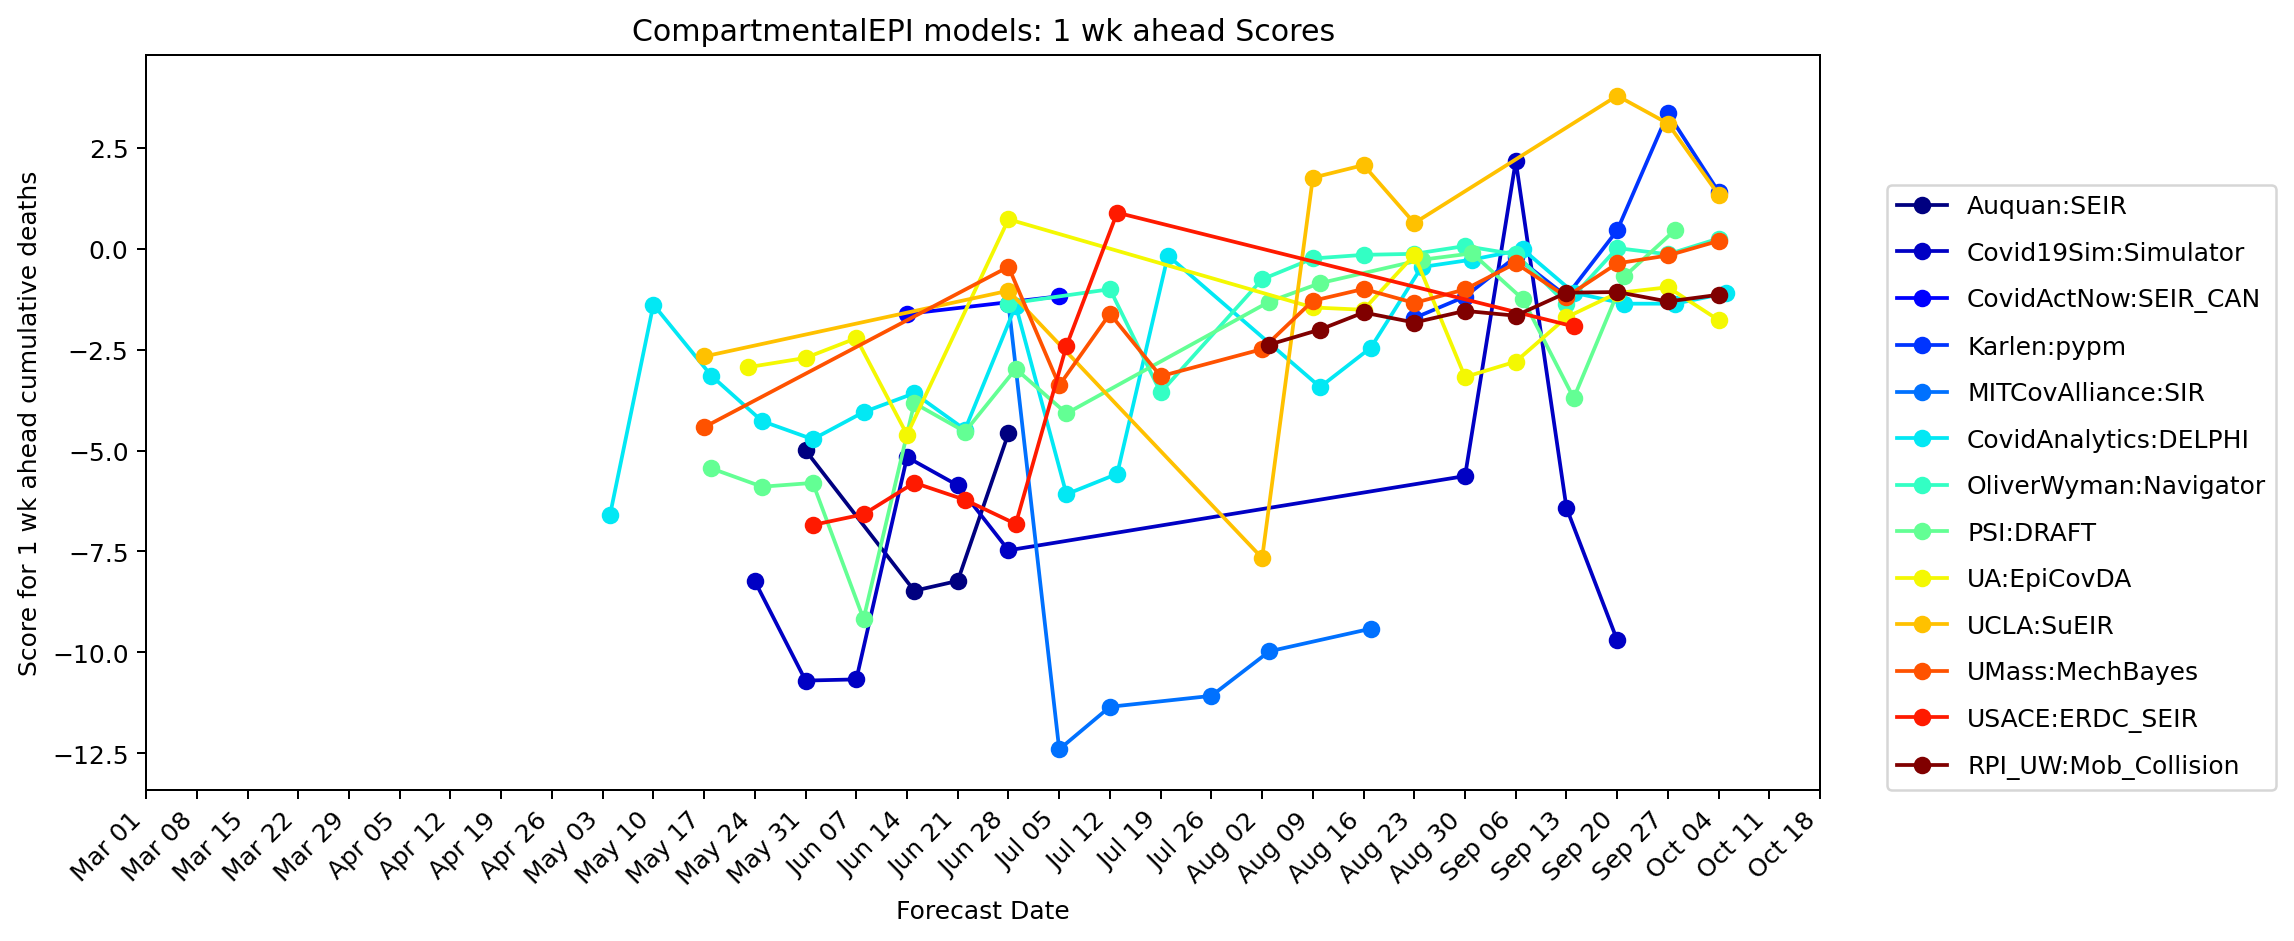

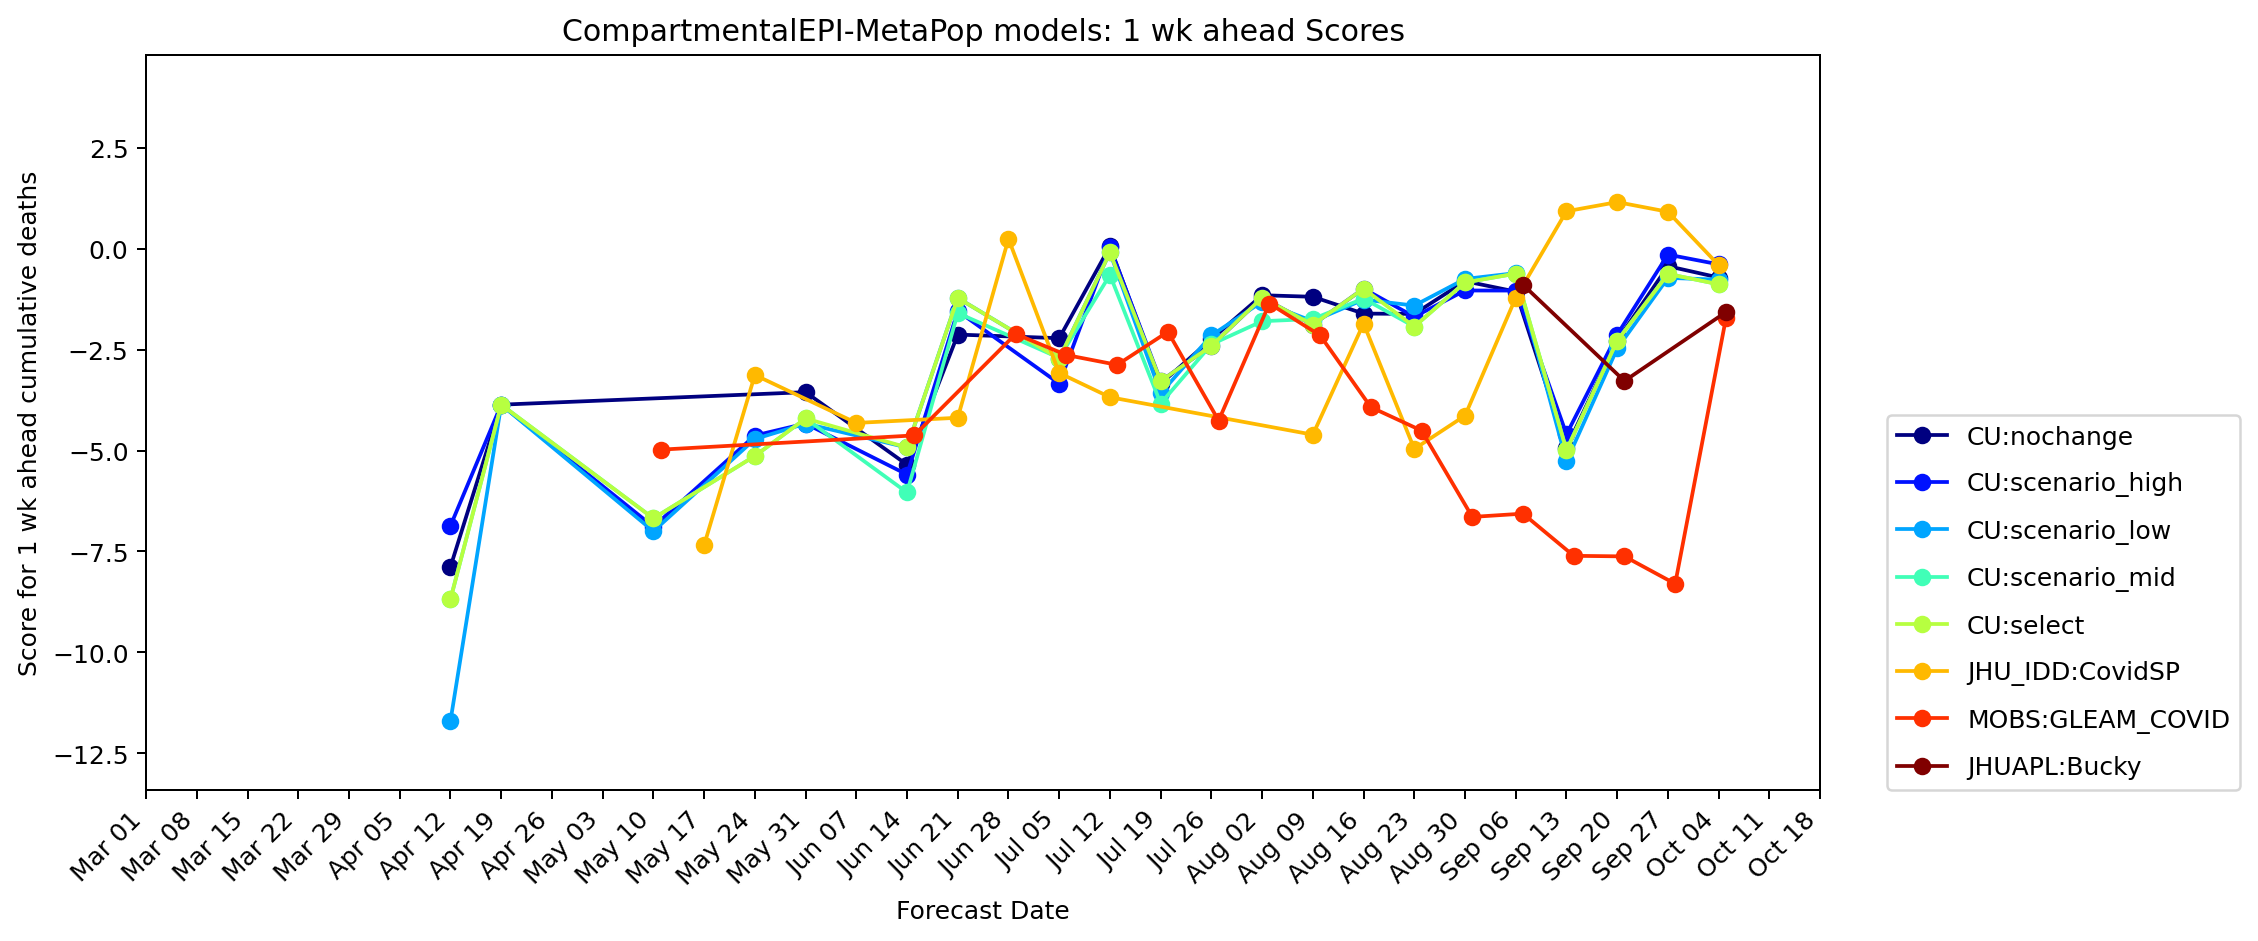

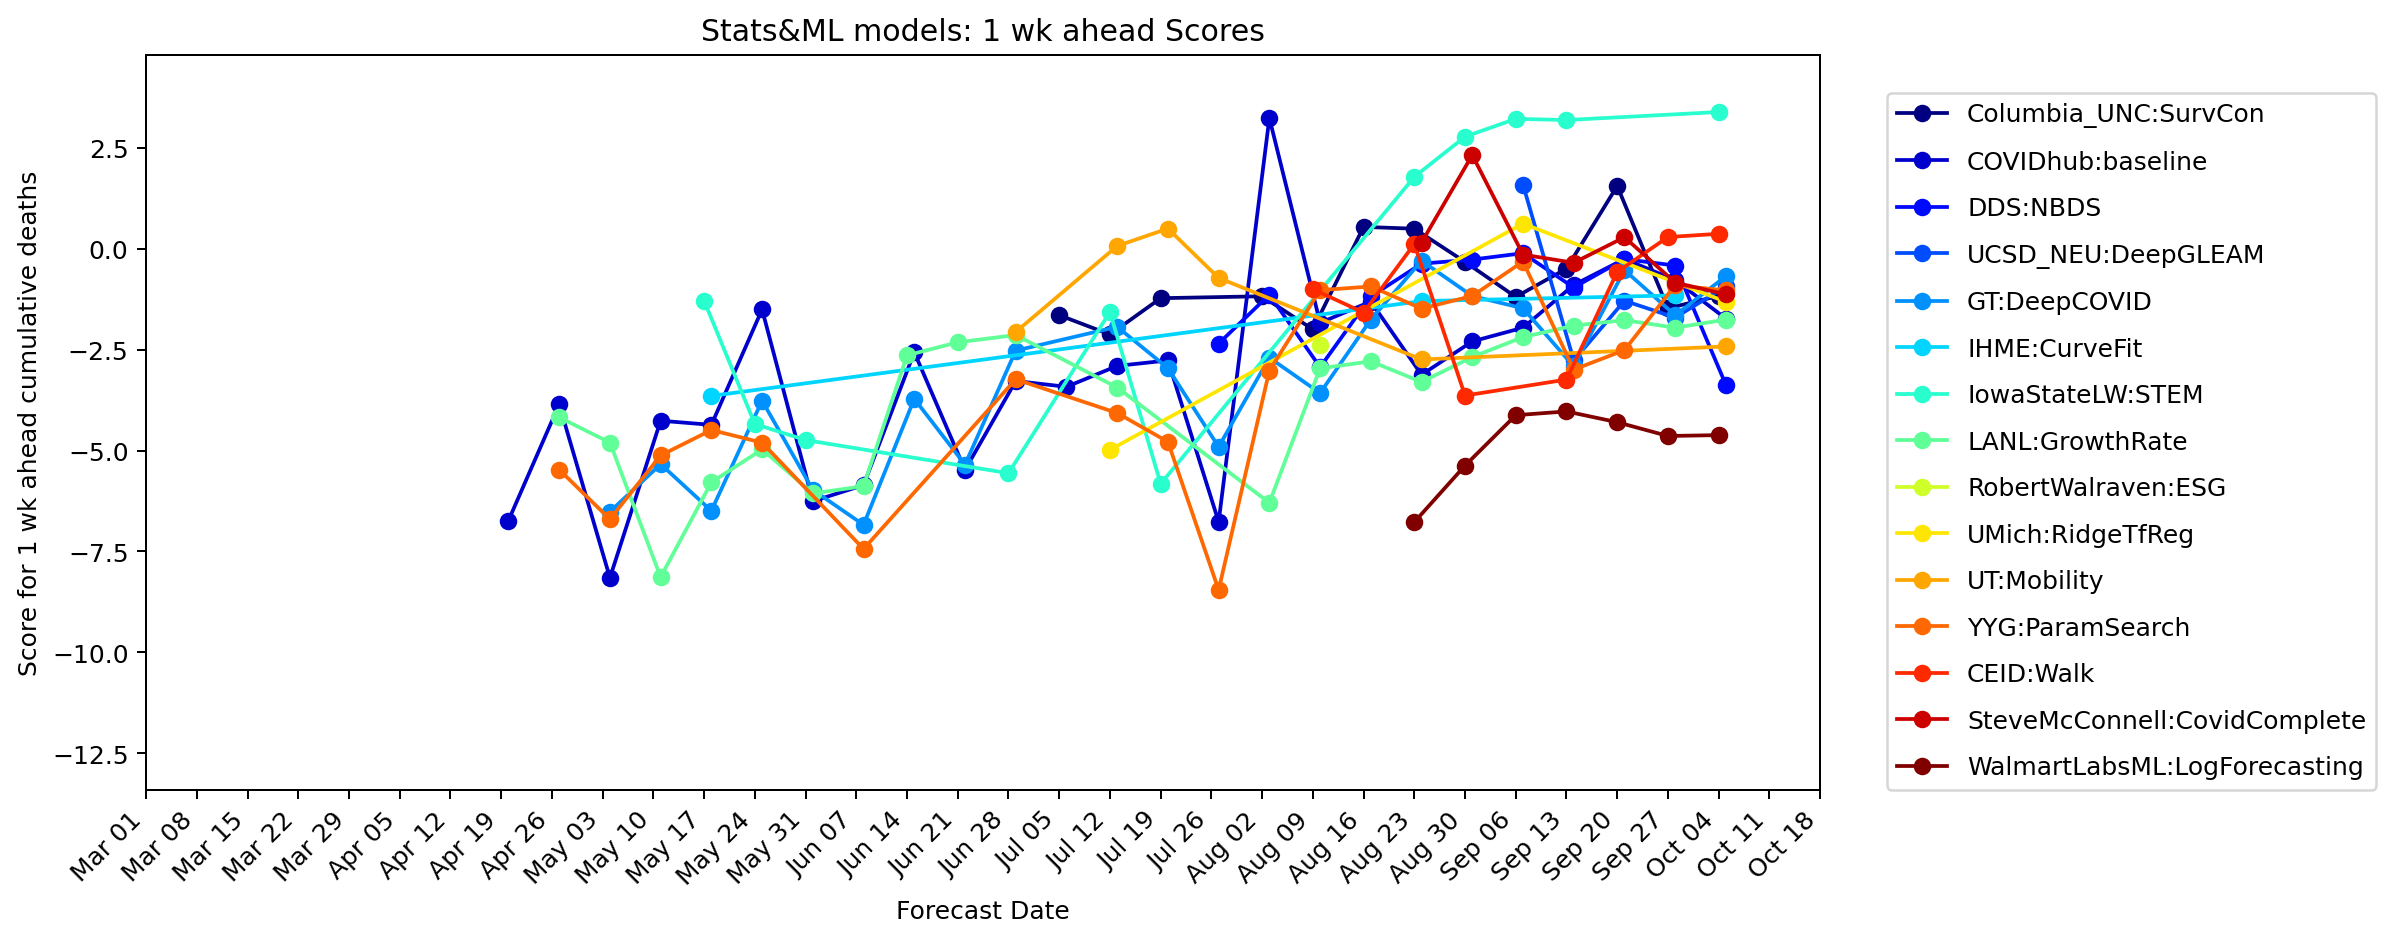

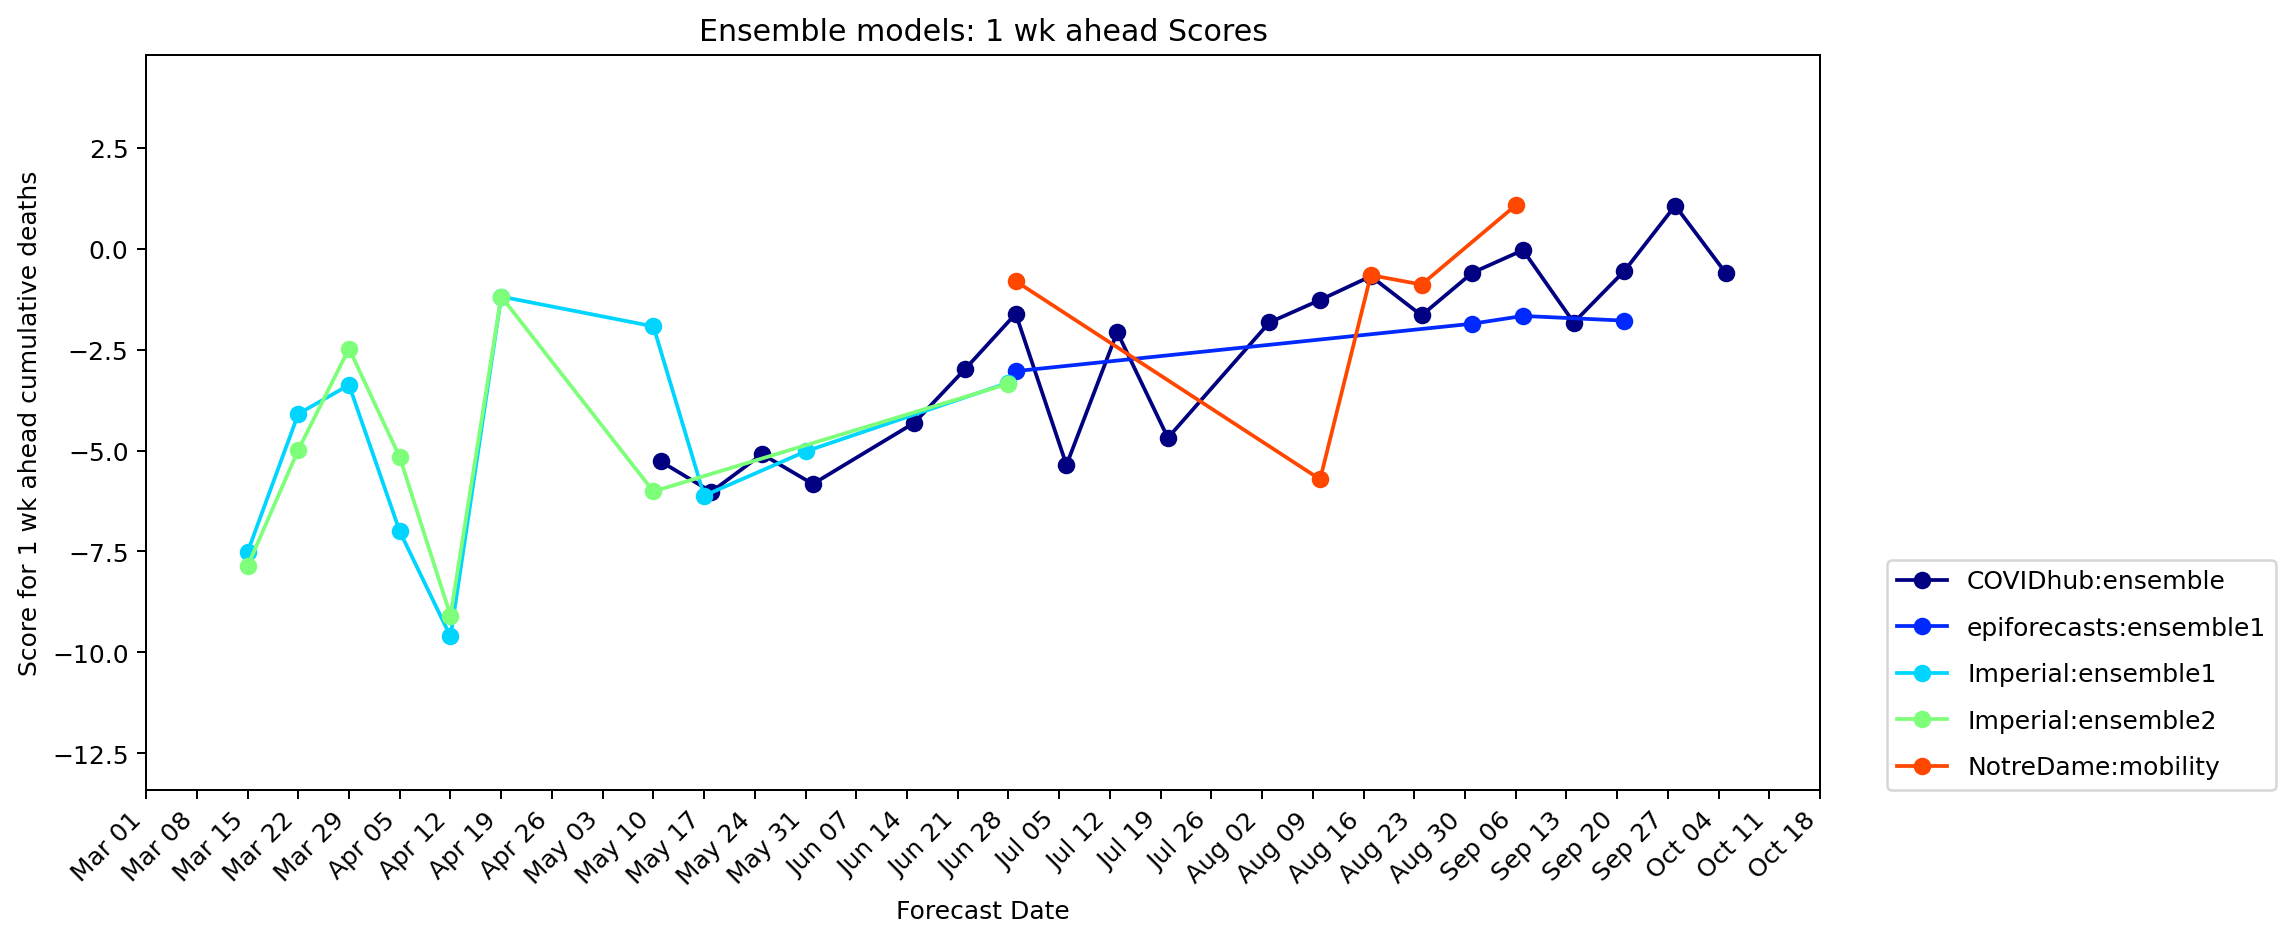

In [44]:
S19.plotgroupsFD(ScoreboardDeaths, modeltypesDeaths, figuresdirectory, 1, 'Death')

/home/osman.yogurtcu/Documents/Projects/Python/Scoreboard/Scoreboard19/scores.py:257: RuntimeWarning: Mean of empty slice
  MerdfPRED['nanmean'] = MerdfPRED.apply(lambda row : np.nanmean(row['score']), axis = 1)
/home/osman.yogurtcu/anaconda3/lib/python3.7/site-packages/numpy/lib/nanfunctions.py:1667: RuntimeWarning: Degrees of freedom <= 0 for slice.
  keepdims=keepdims)


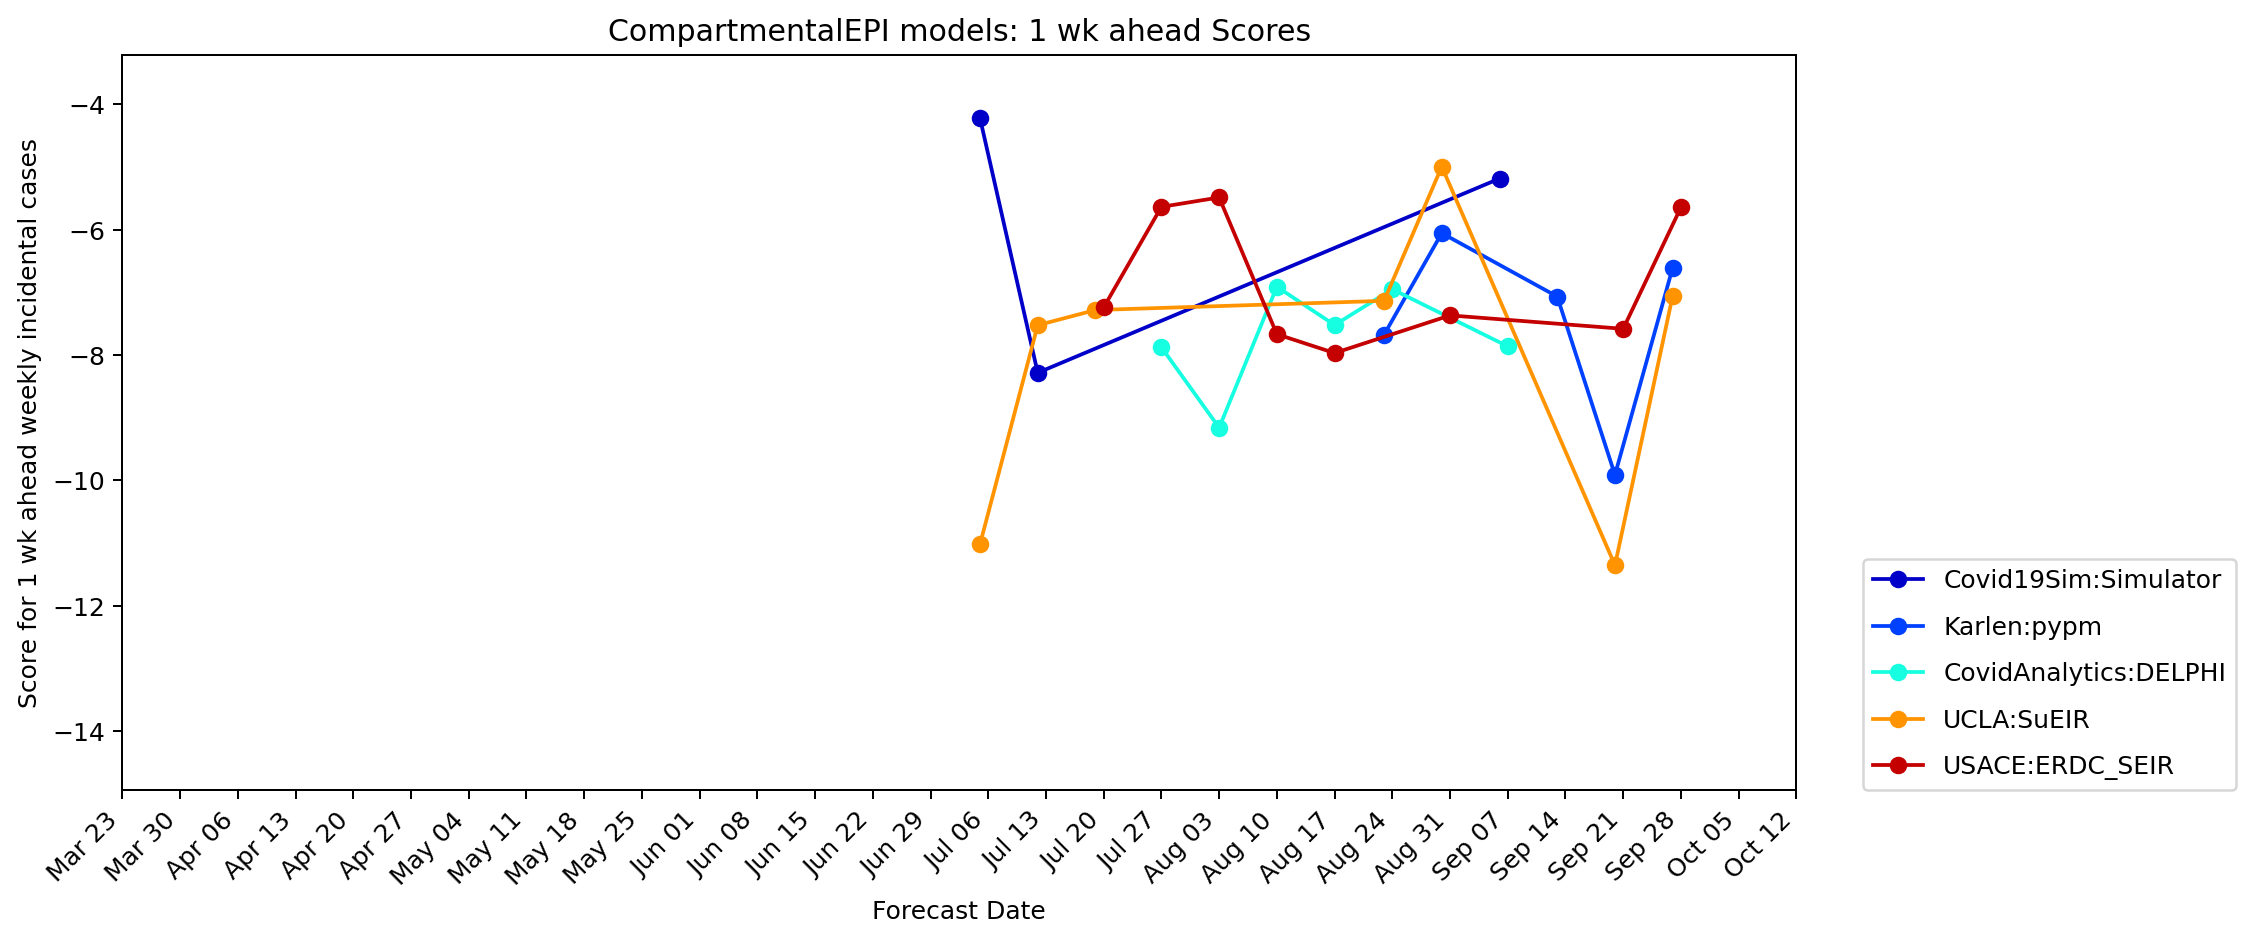

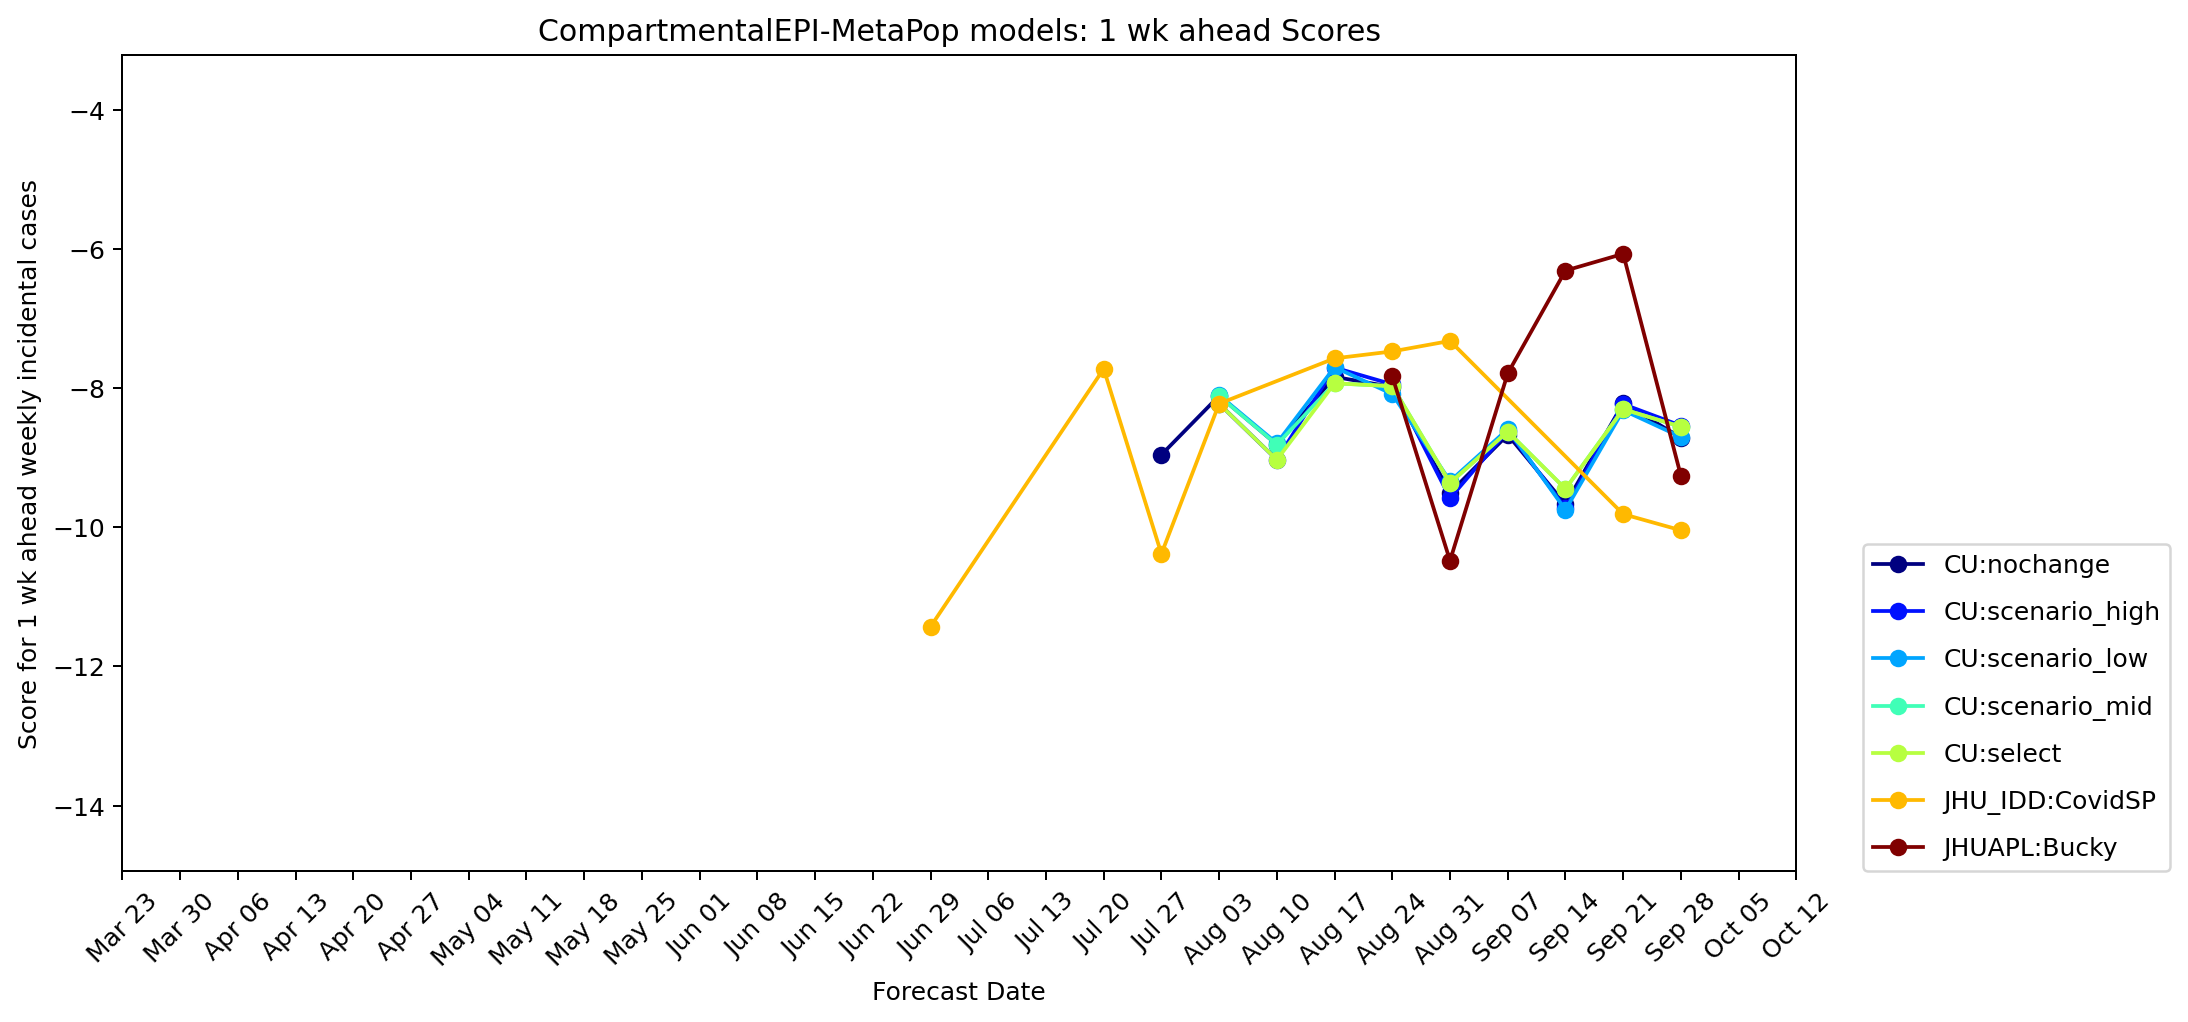

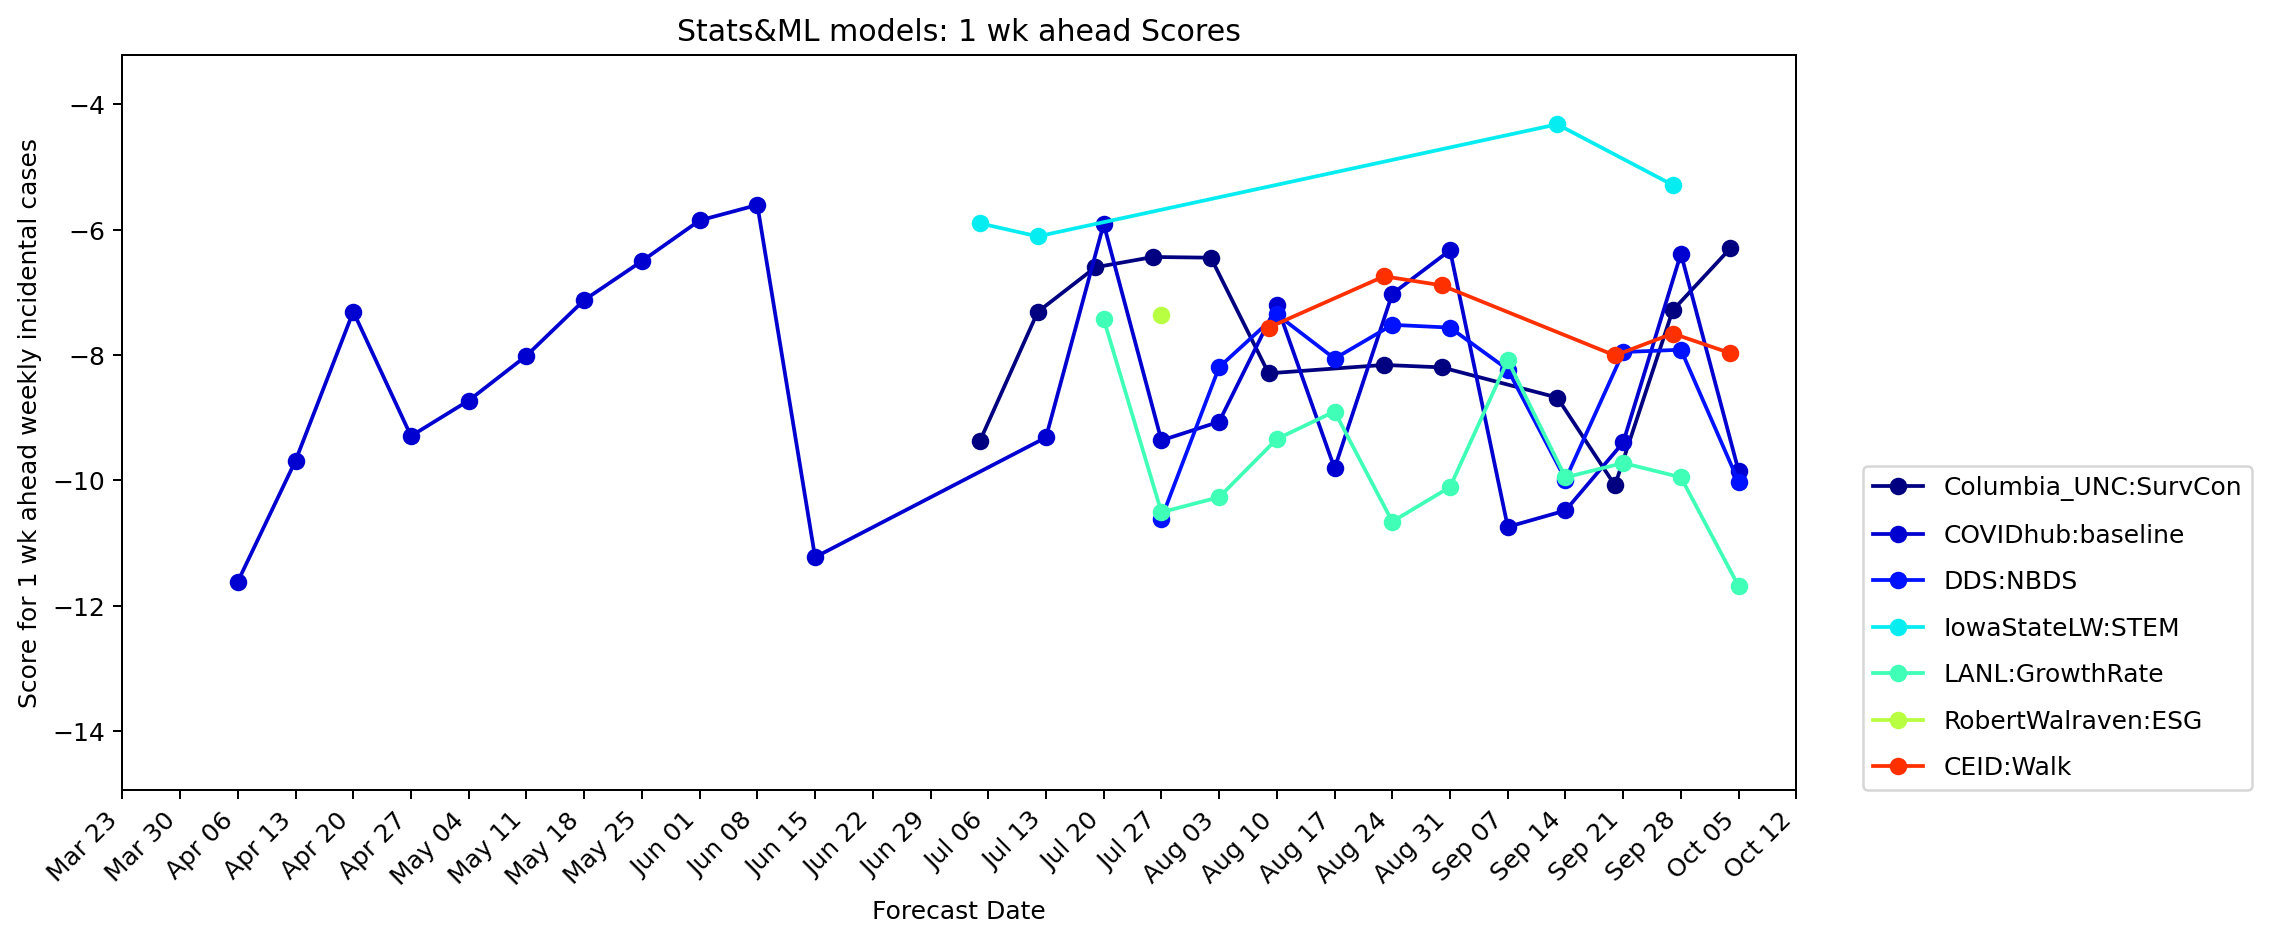

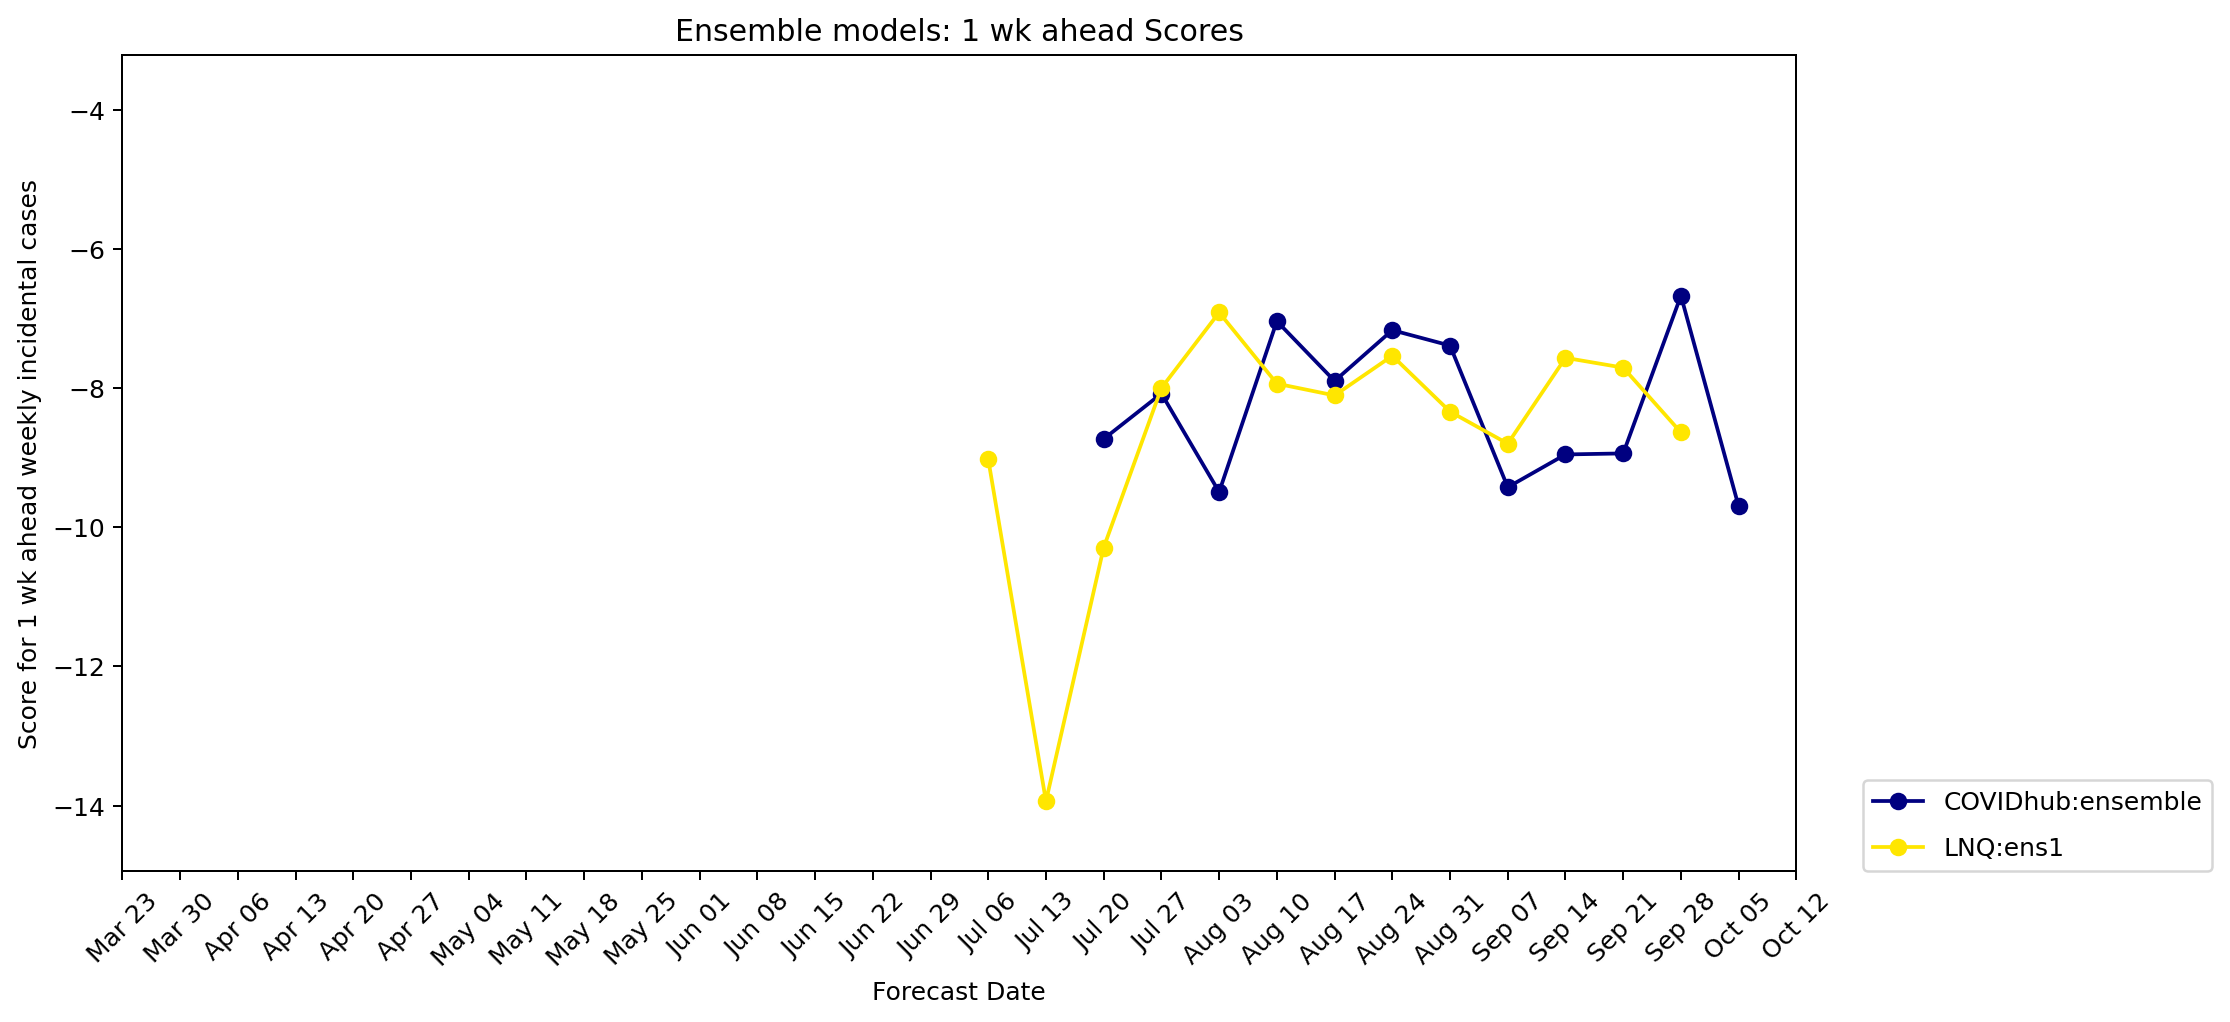

In [45]:
S19.plotgroupsFD(ScoreboardCases, modeltypesCases, figuresdirectory, 1, 'Case')

## Plots by target end date

/home/osman.yogurtcu/Documents/Projects/Python/Scoreboard/Scoreboard19/scores.py:285: RuntimeWarning: Mean of empty slice
  MerdfPRED['nanmean'] = MerdfPRED.apply(lambda row : np.nanmean(row['score']), axis = 1)
/home/osman.yogurtcu/anaconda3/lib/python3.7/site-packages/numpy/lib/nanfunctions.py:1667: RuntimeWarning: Degrees of freedom <= 0 for slice.
  keepdims=keepdims)


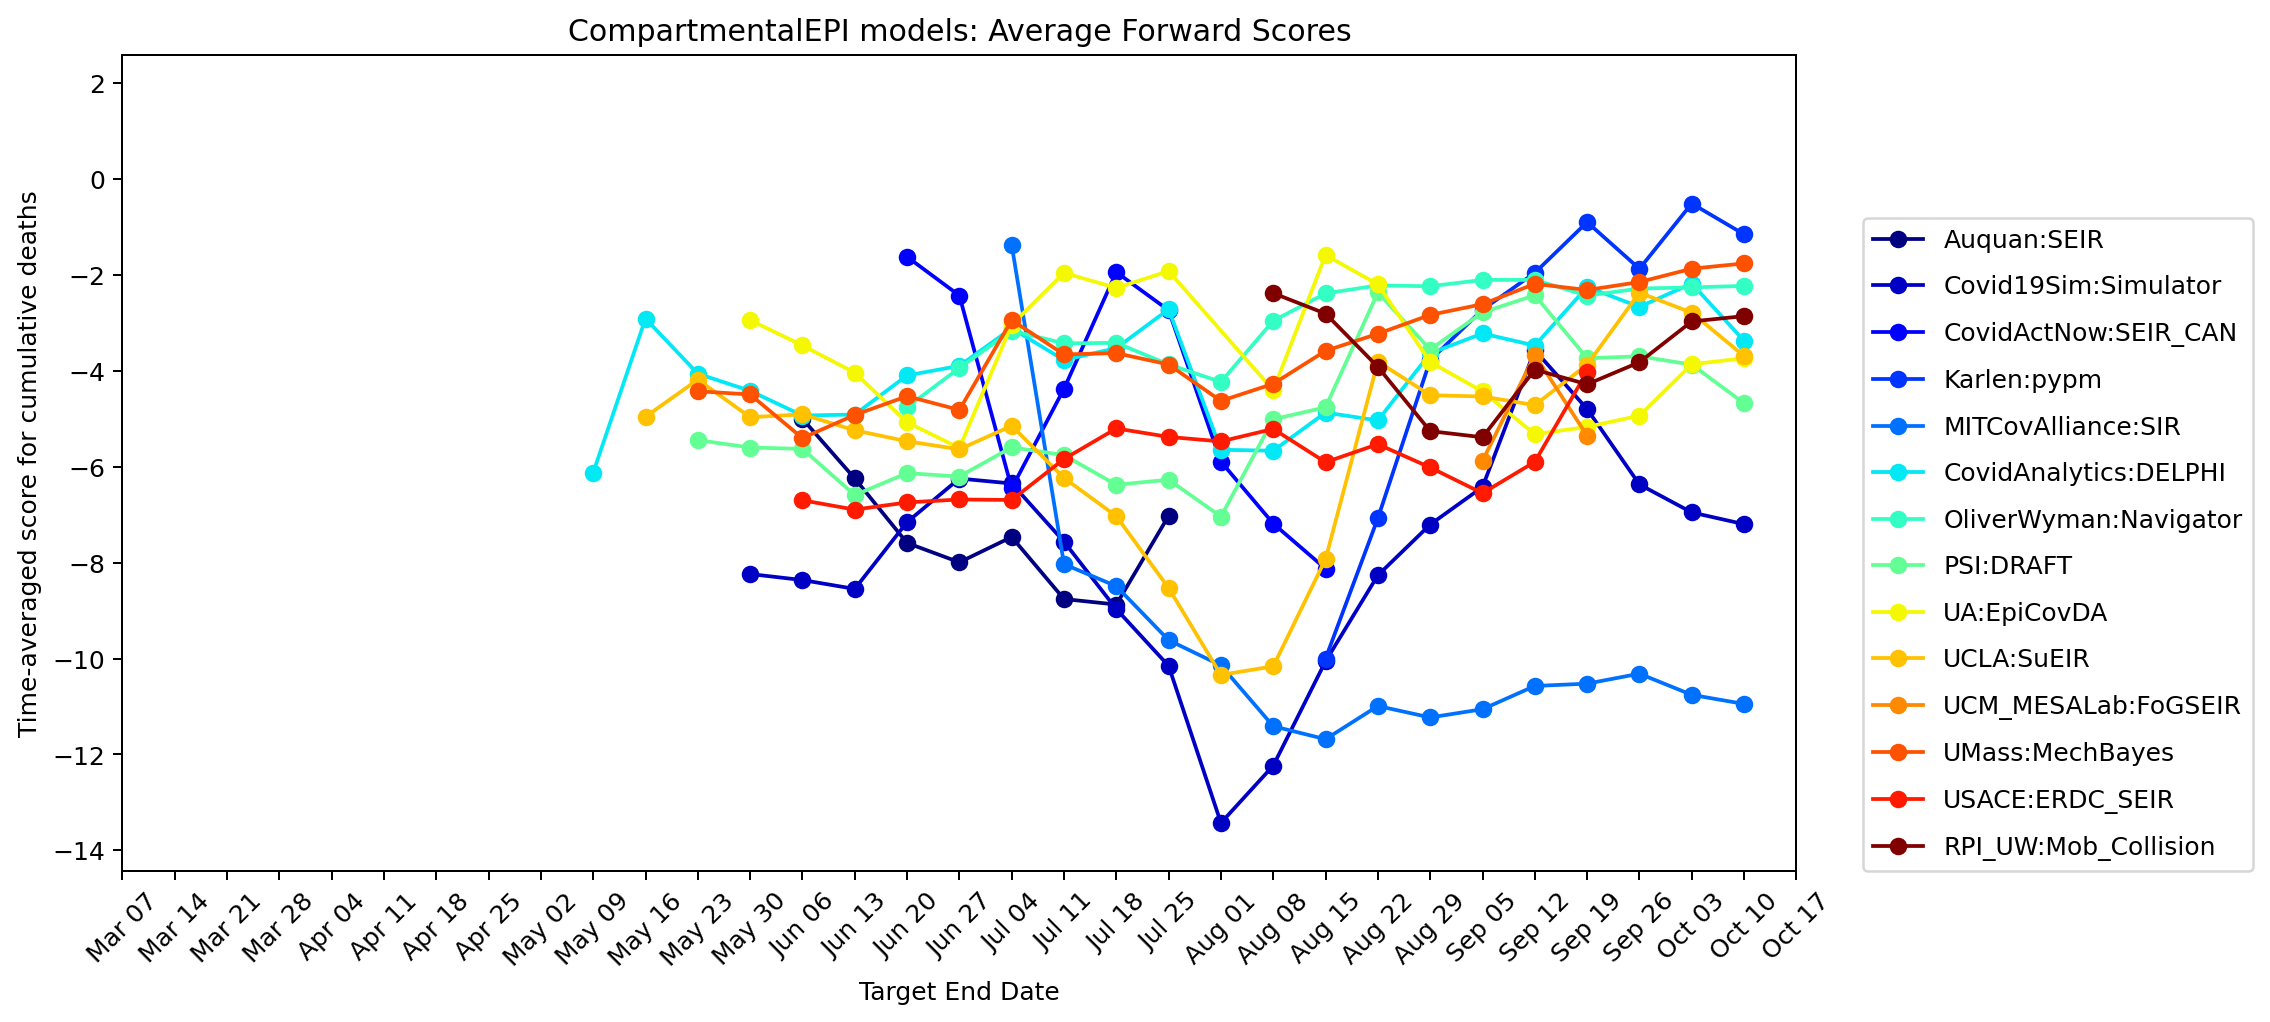

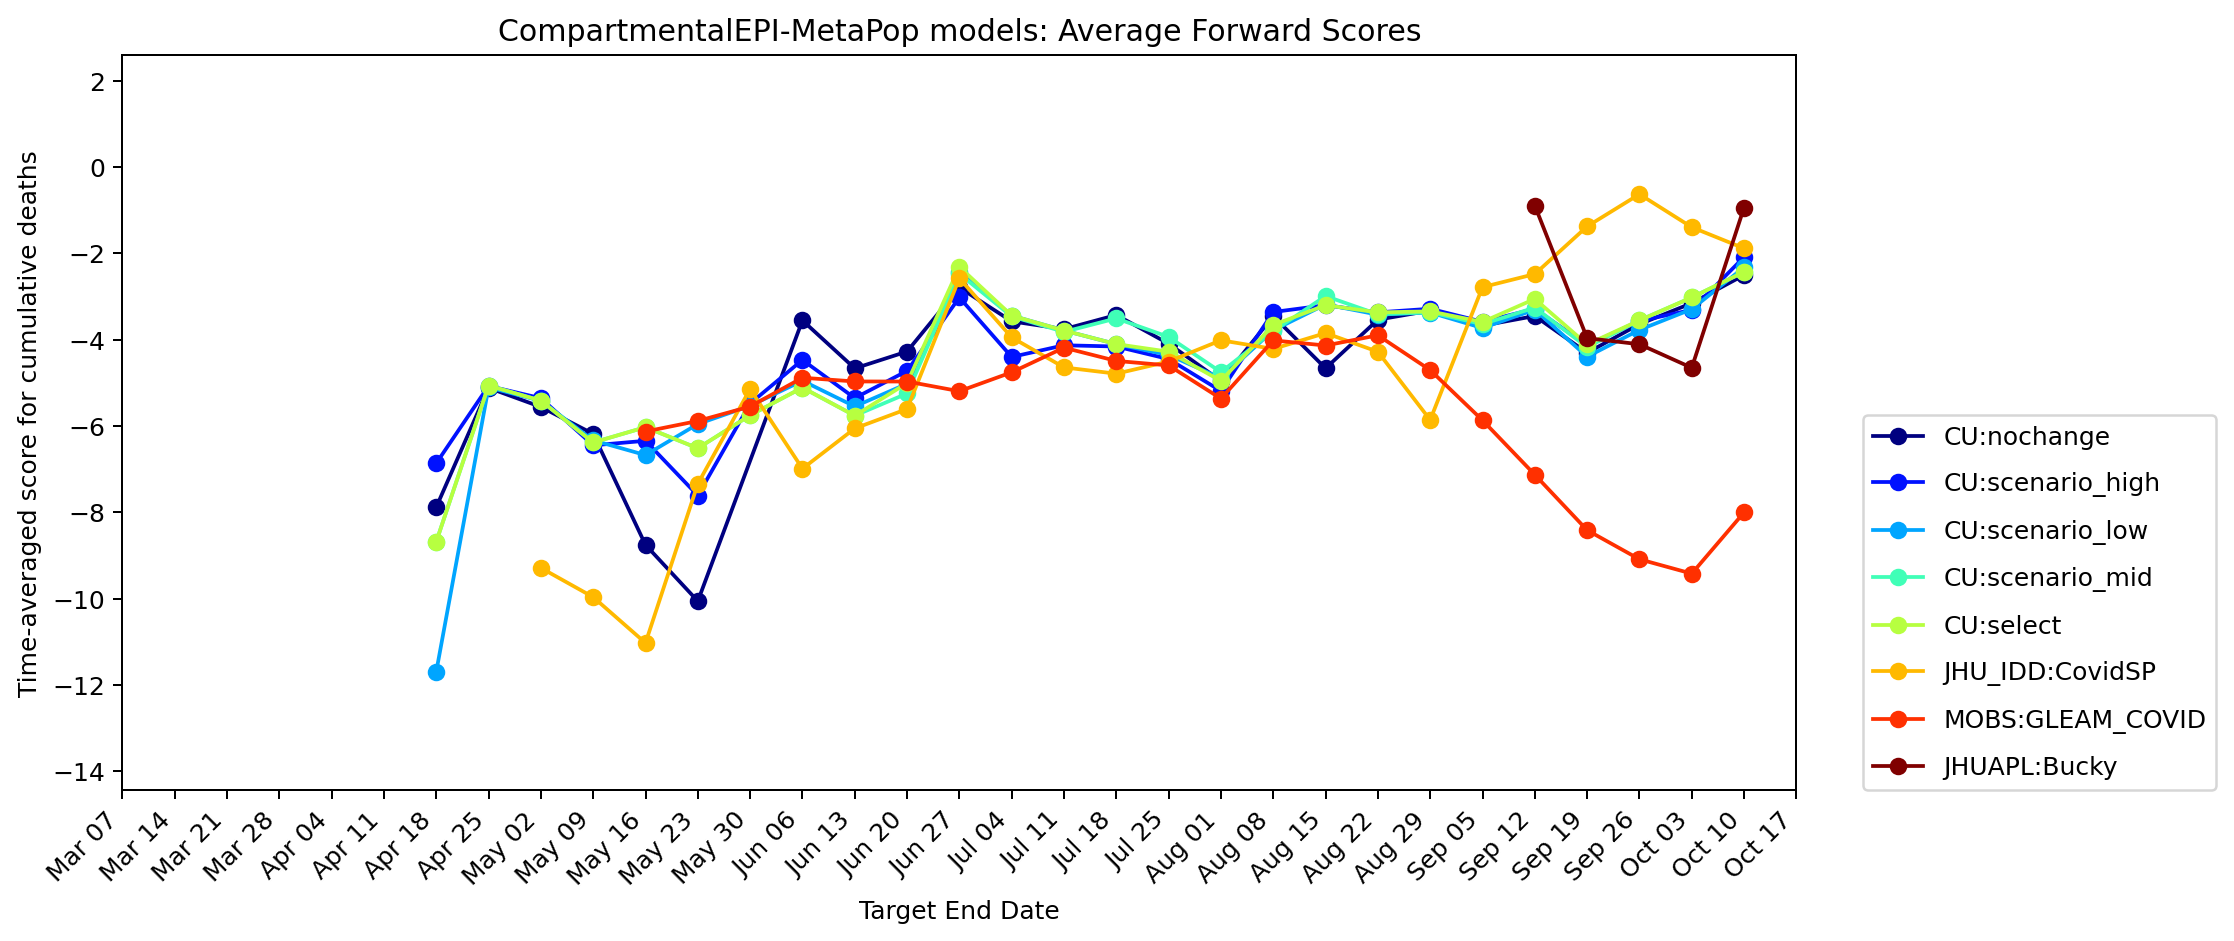

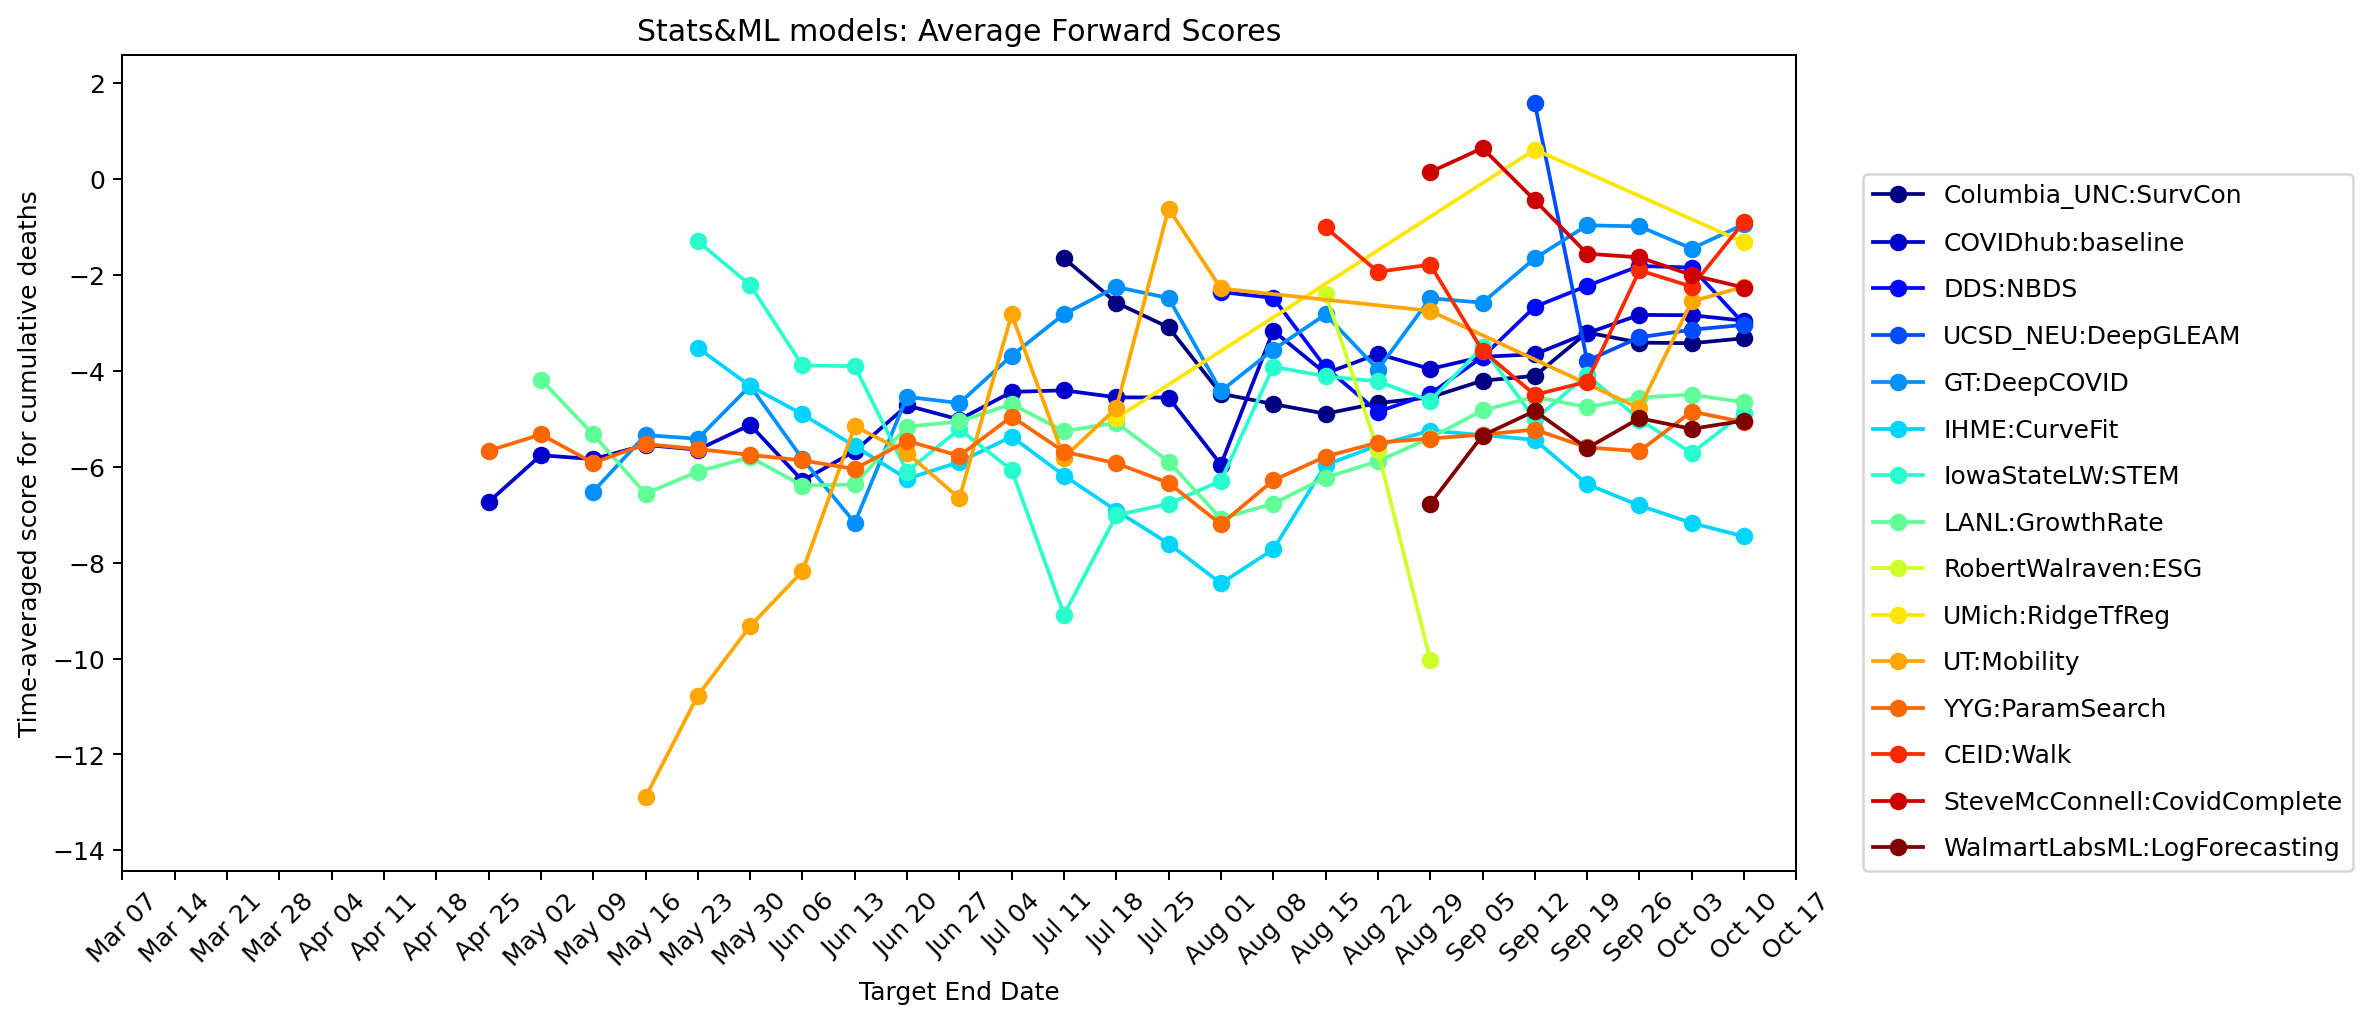

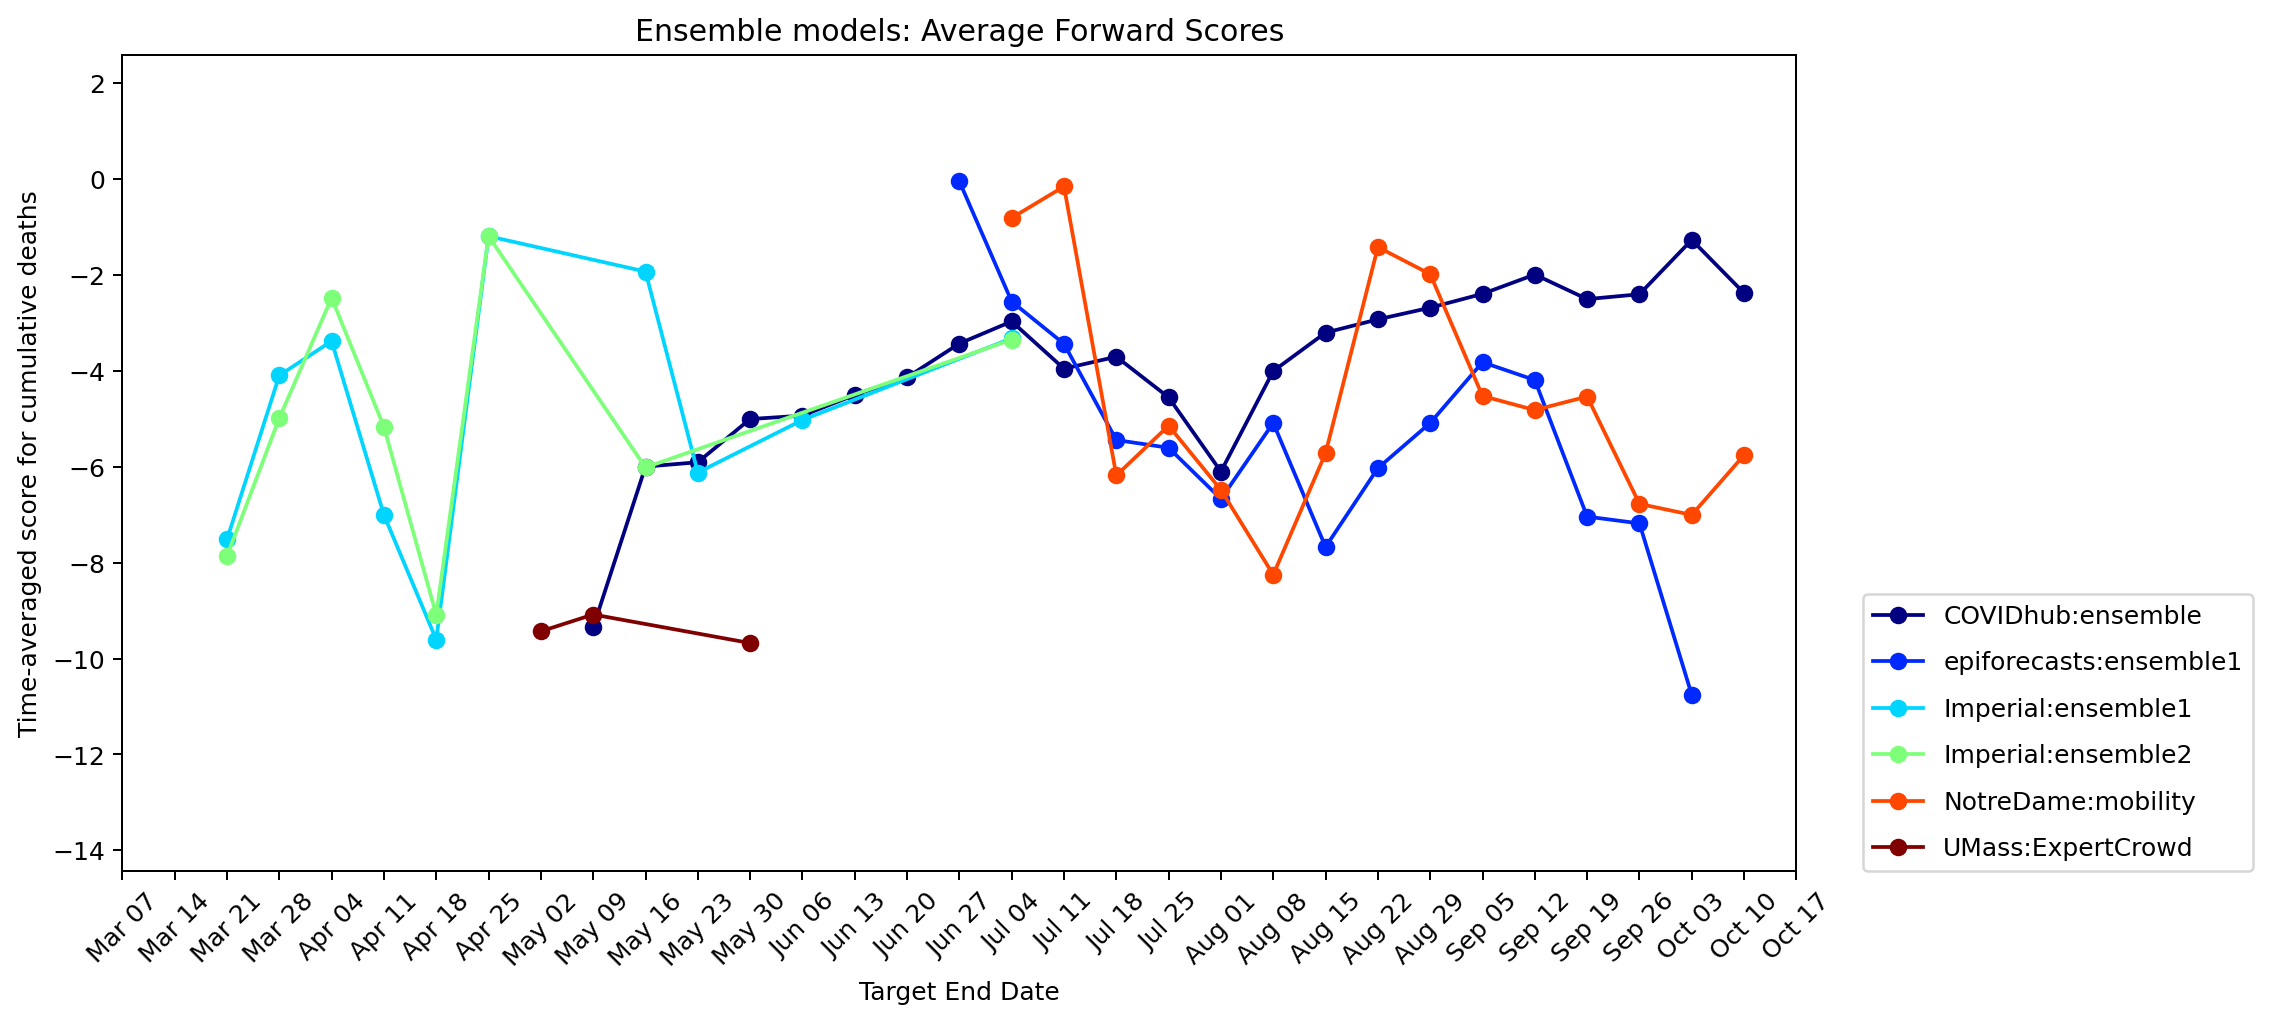

In [46]:
S19.plotgroupsTD(ScoreboardDeaths, modeltypesDeaths, figuresdirectory, 'Death')

/home/osman.yogurtcu/Documents/Projects/Python/Scoreboard/Scoreboard19/scores.py:285: RuntimeWarning: Mean of empty slice
  MerdfPRED['nanmean'] = MerdfPRED.apply(lambda row : np.nanmean(row['score']), axis = 1)
/home/osman.yogurtcu/anaconda3/lib/python3.7/site-packages/numpy/lib/nanfunctions.py:1667: RuntimeWarning: Degrees of freedom <= 0 for slice.
  keepdims=keepdims)


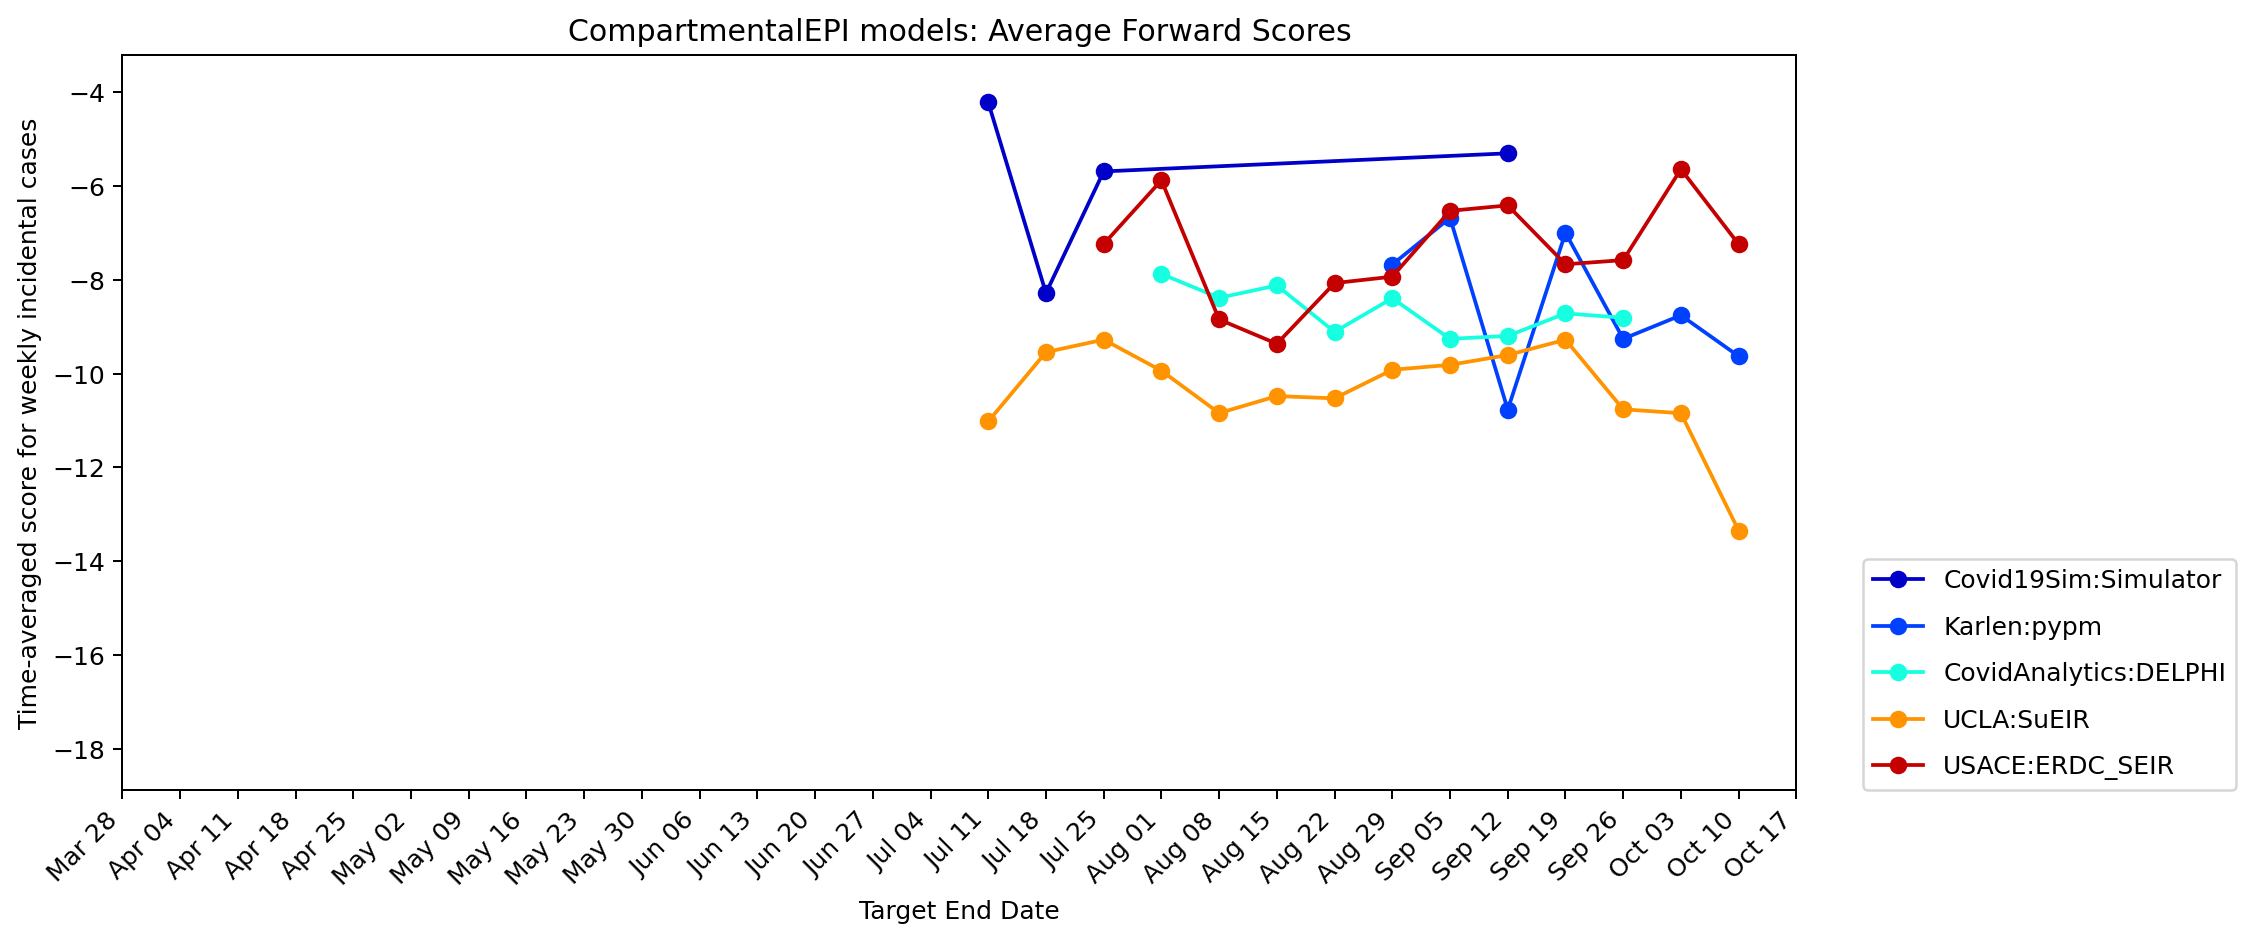

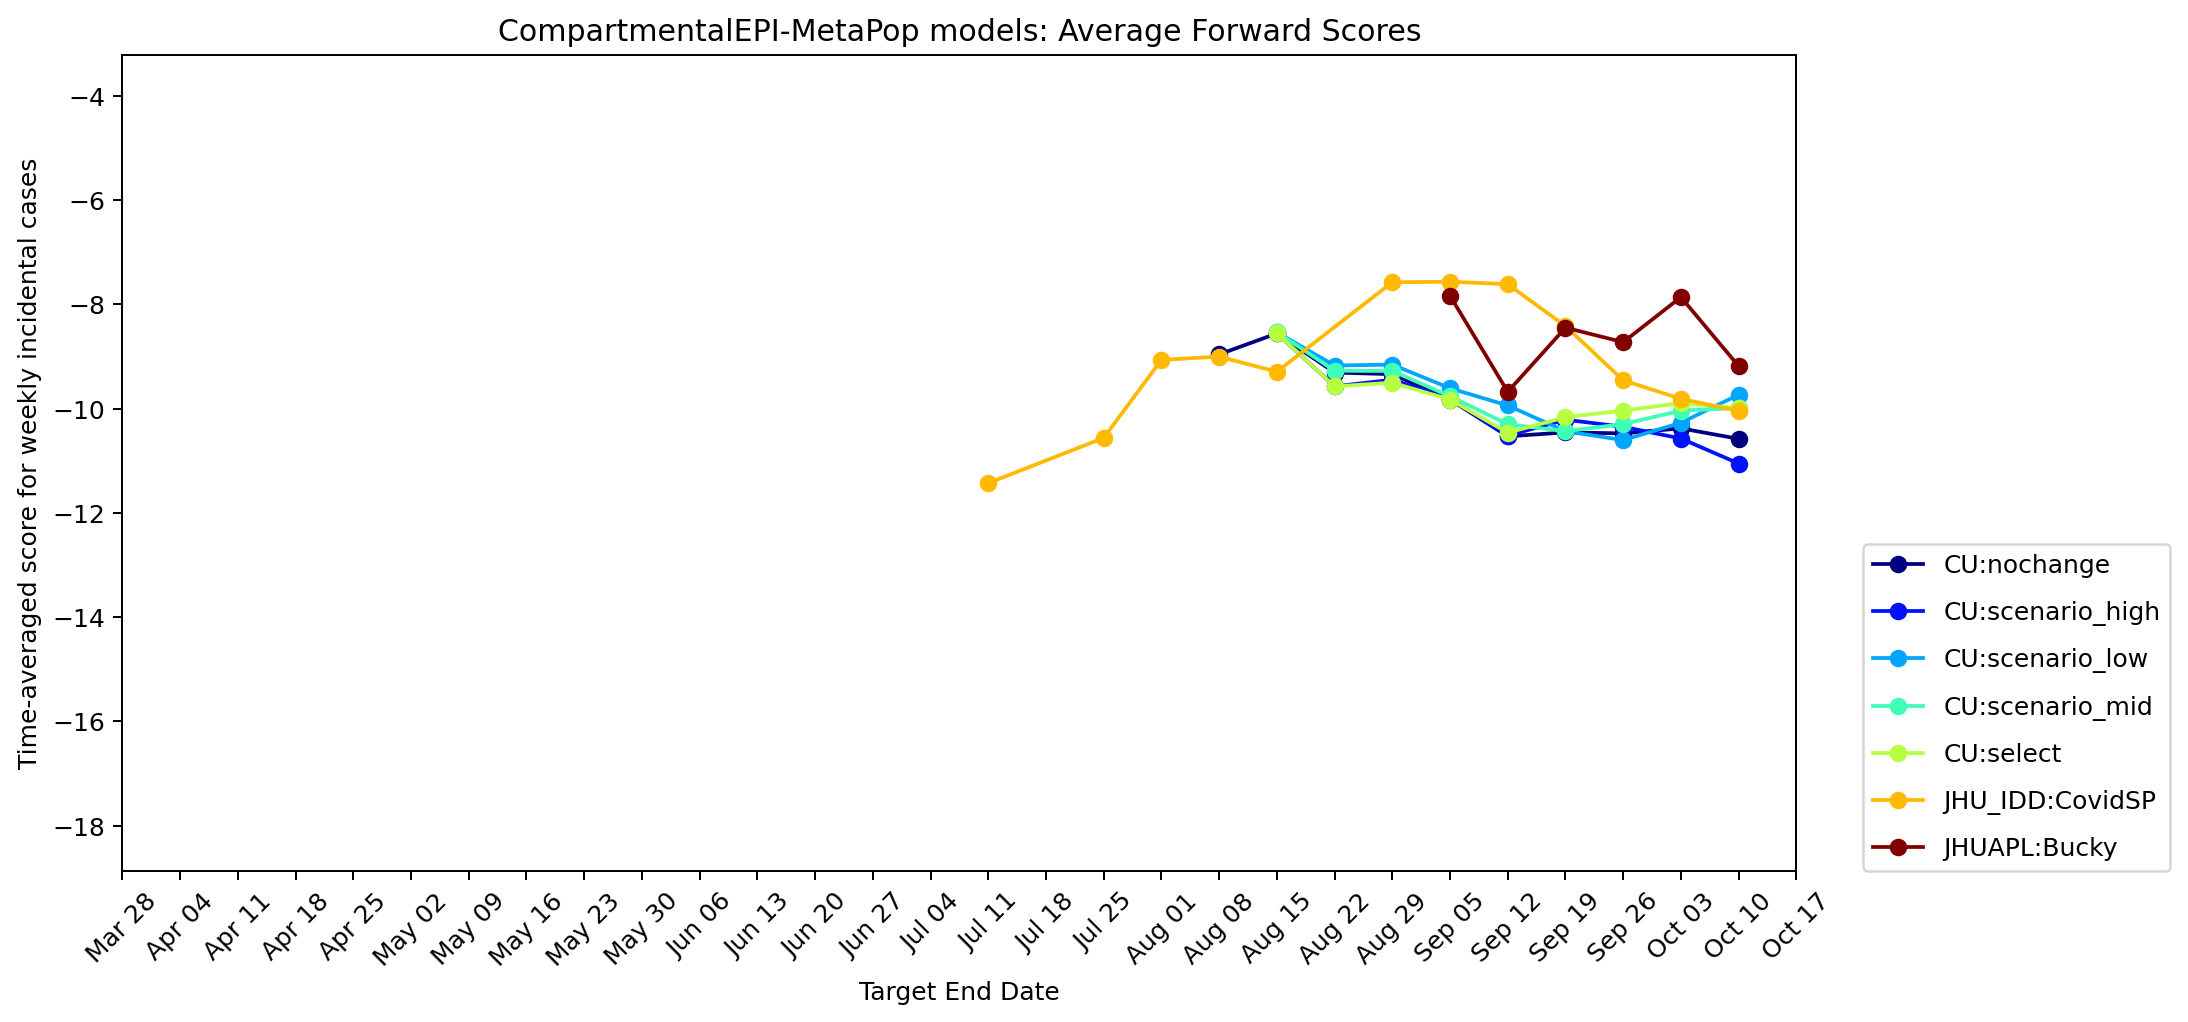

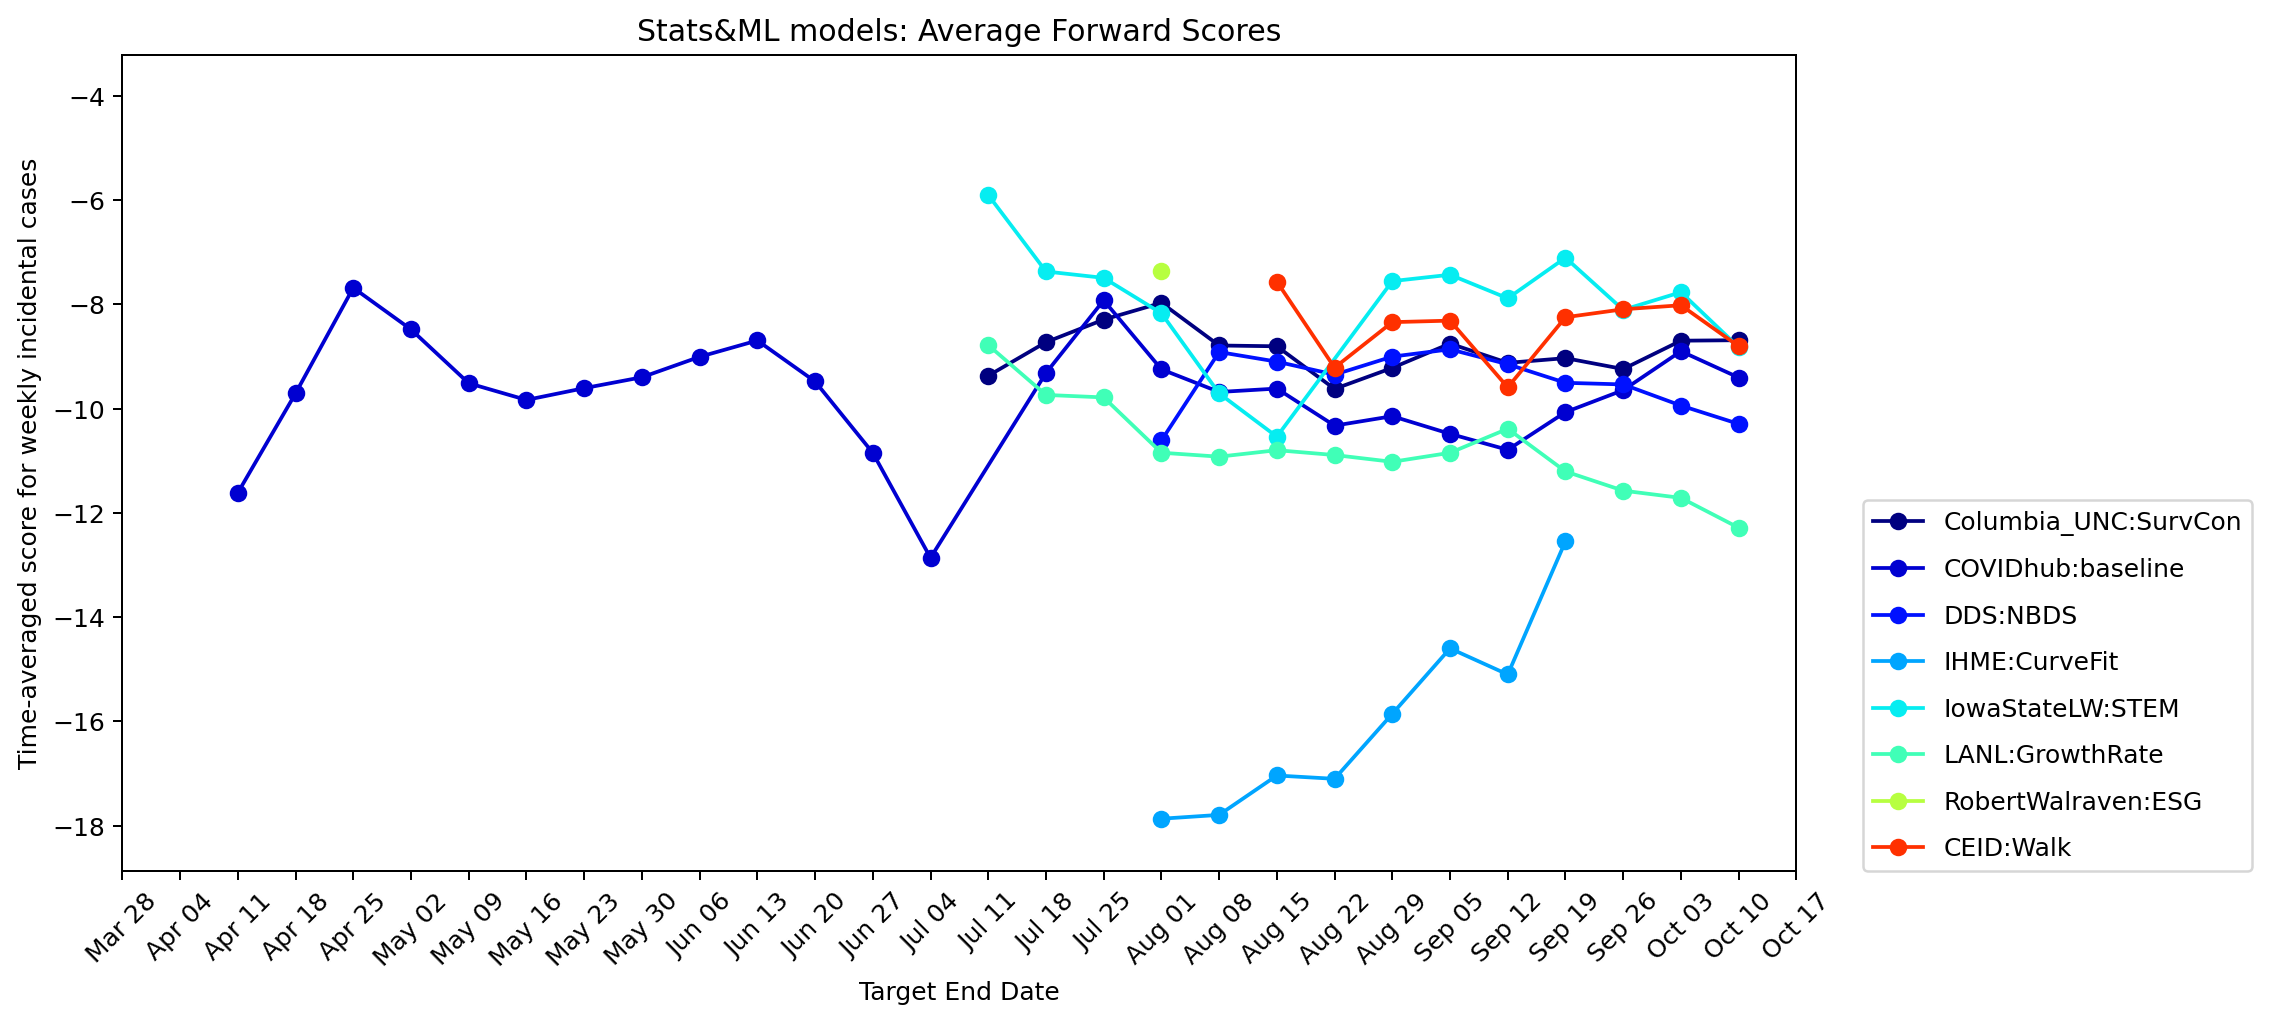

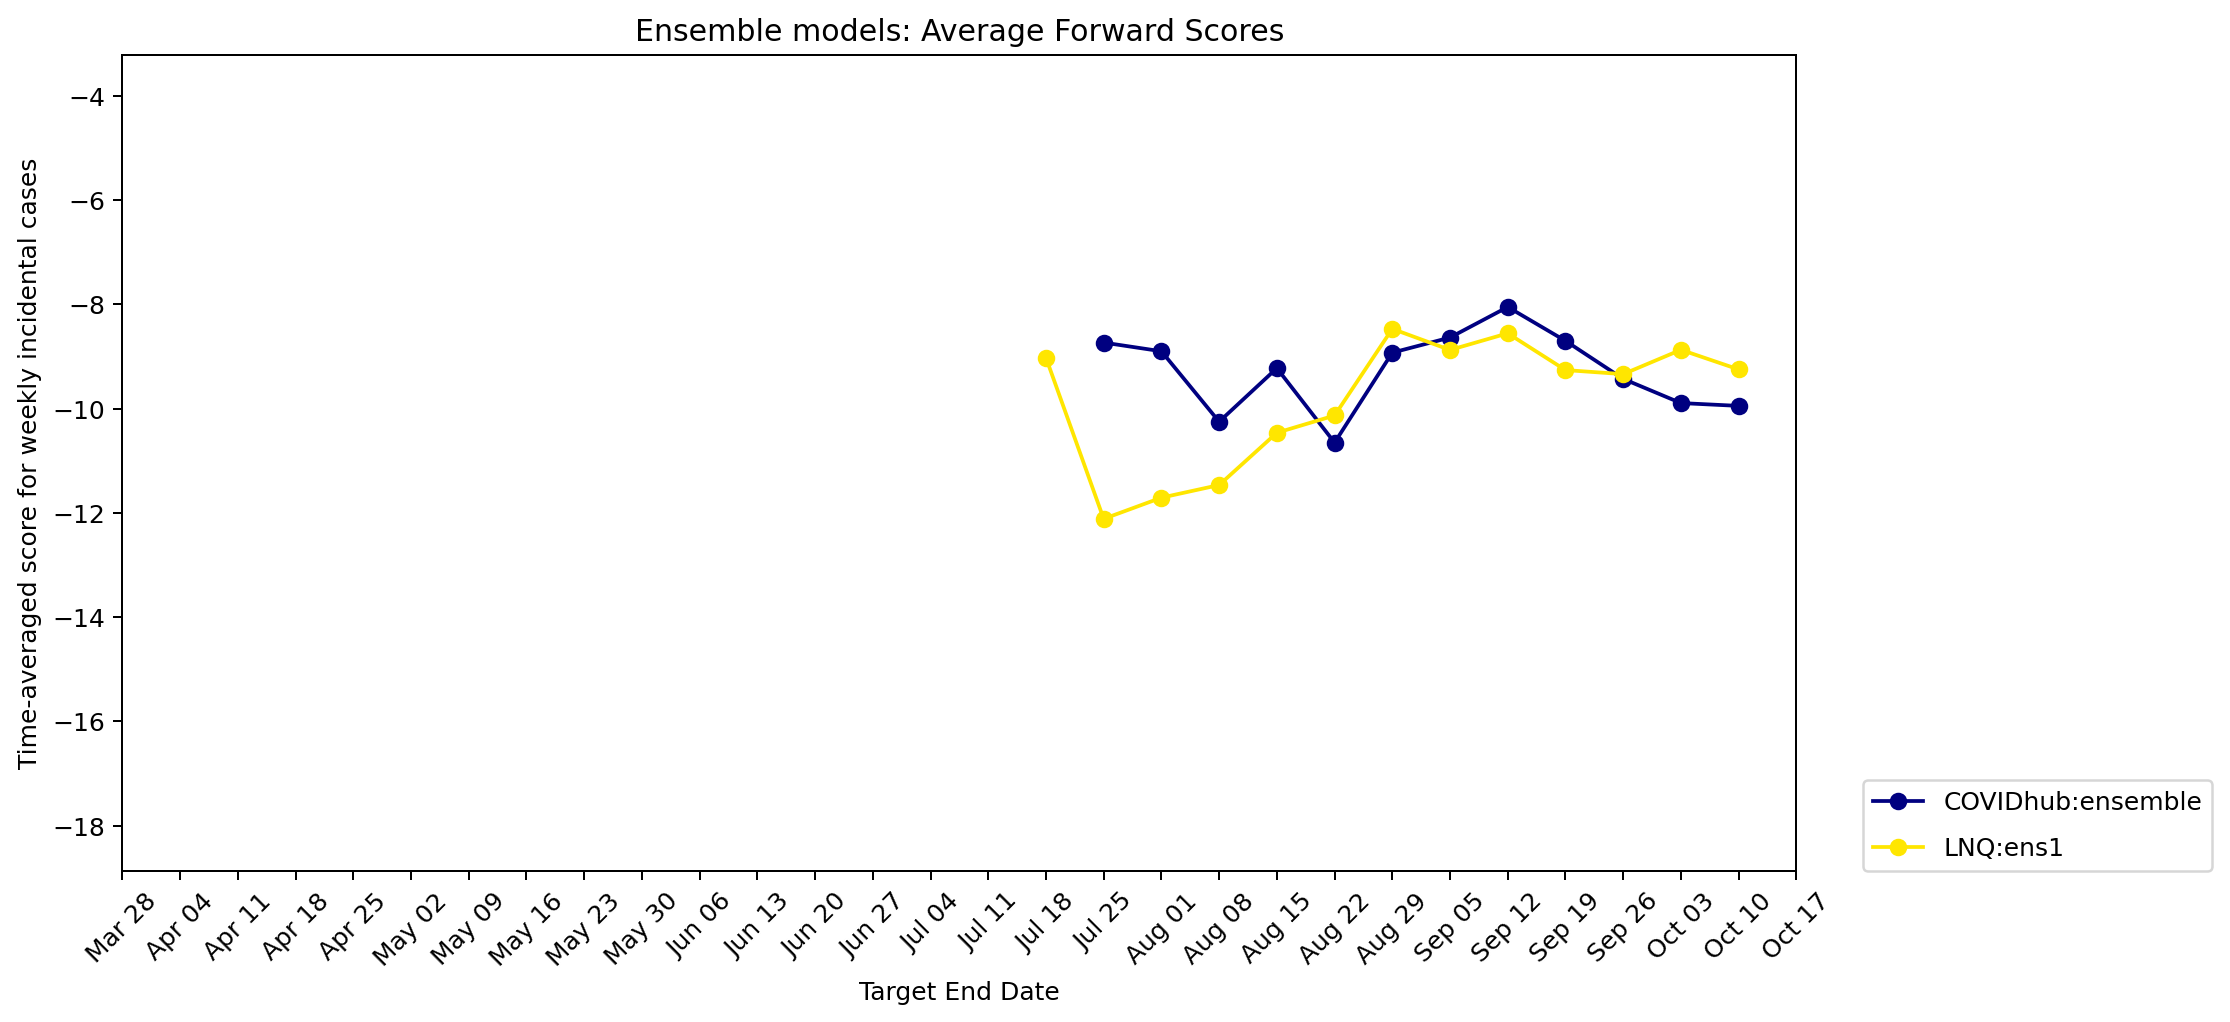

In [47]:
S19.plotgroupsTD(ScoreboardCases, modeltypesCases, figuresdirectory, 'Case')

### ADD TO GITHUB

In [48]:
os.chdir(gitdir)
# #!git remote set-url origin https://github.com/ONYLAB/Scoreboard.git
# #!git config credential.helper store
# !git stash
# !git pull --rebase origin master
!git add --all
!git commit -am “Update”
!git push -u origin master
os.chdir(mypwd[0])

[master 3cde6d3] “Update”
 38 files changed, 104209 insertions(+), 2901 deletions(-)
 rewrite Data/ScoreboardCases.pkl (69%)
 rewrite Figures/1Week/CUMDEATH_Forward_Scores_CompartmentalEPI-MetaPopmodels.png (89%)
 rewrite Figures/1Week/CUMDEATH_Forward_Scores_CompartmentalEPImodels.png (89%)
 rewrite Figures/1Week/CUMDEATH_Forward_Scores_Ensemblemodels.png (91%)
 rewrite Figures/1Week/CUMDEATH_Forward_Scores_Stats&MLmodels.png (89%)
 rewrite Figures/1Week/INCCASE_Forward_Scores_CompartmentalEPI-MetaPopmodels.png (87%)
 rewrite Figures/1Week/INCCASE_Forward_Scores_CompartmentalEPImodels.png (89%)
 rewrite Figures/1Week/INCCASE_Forward_Scores_Ensemblemodels.png (87%)
 rewrite Figures/1Week/INCCASE_Forward_Scores_Stats&MLmodels.png (90%)
 rewrite Figures/CUMDEATH_Average_Forward_Scores_CompartmentalEPI-MetaPopmodels.png (93%)
 rewrite Figures/CUMDEATH_Average_Forward_Scores_CompartmentalEPImodels.png (91%)
 rewrite Figures/CUMDEATH_Average_Forward_Scores_Ensemblemodels.png (94%)
 rewrite 